# ****ASSIGNMENT 9**** #

## **ASSOCIATION RULES** ##
# **PART 1** #

File : book.csv

In [249]:

import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder


palette_color = sns.color_palette('rainbow')
import warnings
warnings.filterwarnings('ignore')

### **Importing data from file book.csv**

In [250]:
# Reading the data from the file 'book.csv'
book_data = pd.read_csv("book.csv")
book_data

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


### **EDA (Exploratory Data Analysis)**

In [251]:
book_data.shape

(2000, 11)

#### *Descriptive Analysis* ####

In [252]:
book_data.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [253]:
book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


#### *Checking for missing values*

In [254]:
# check for missing values
book_data.isna().sum() # The result shows that there are no missing values

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

#### *Checking for Null Values*

In [255]:
# Checking to see if there are any null values
# We can get this information using book_data.info() option as well
book_data.isnull().sum() # The result shows that there are no null values

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

#### *Checking the data structure* ####

In [256]:
# Data Structure
print(type(book_data))
book_data.shape

<class 'pandas.core.frame.DataFrame'>


(2000, 11)

In [257]:
# Checking data types
book_data.dtypes # check data types of all variables

ChildBks     int64
YouthBks     int64
CookBks      int64
DoItYBks     int64
RefBks       int64
ArtBks       int64
GeogBks      int64
ItalCook     int64
ItalAtlas    int64
ItalArt      int64
Florence     int64
dtype: object

In [258]:
# The Columns are:
print(f"The number of columns are {book_data.columns.size} and the columns are -\n\n{book_data.columns}\n")

# Column-Wise Breakup
for column in book_data.columns:
    print(book_data[column].value_counts(),"\n")

The number of columns are 11 and the columns are -

Index(['ChildBks', 'YouthBks', 'CookBks', 'DoItYBks', 'RefBks', 'ArtBks',
       'GeogBks', 'ItalCook', 'ItalAtlas', 'ItalArt', 'Florence'],
      dtype='object')

ChildBks
0    1154
1     846
Name: count, dtype: int64 

YouthBks
0    1505
1     495
Name: count, dtype: int64 

CookBks
0    1138
1     862
Name: count, dtype: int64 

DoItYBks
0    1436
1     564
Name: count, dtype: int64 

RefBks
0    1571
1     429
Name: count, dtype: int64 

ArtBks
0    1518
1     482
Name: count, dtype: int64 

GeogBks
0    1448
1     552
Name: count, dtype: int64 

ItalCook
0    1773
1     227
Name: count, dtype: int64 

ItalAtlas
0    1926
1      74
Name: count, dtype: int64 

ItalArt
0    1903
1      97
Name: count, dtype: int64 

Florence
0    1783
1     217
Name: count, dtype: int64 



In [259]:
book_data.shape

(2000, 11)

### **Data preprocessing not required as it is already in transaction format** ### 

In [260]:
# Getting the count for columns and sorting them in descending order
bookdf_desc = book_data.sum().sort_values(ascending=False)
columns = bookdf_desc.keys().tolist()
values = bookdf_desc.values.tolist()
col_cnt_df = pd.DataFrame(columns=['Category', 'Count'])
col_cnt_df['Category'] = columns
col_cnt_df['Count'] = values
col_cnt_df

,Category,Count
0,CookBks,862
1,ChildBks,846
2,DoItYBks,564
3,GeogBks,552
4,YouthBks,495
5,ArtBks,482
6,RefBks,429
7,ItalCook,227
8,Florence,217
9,ItalArt,97


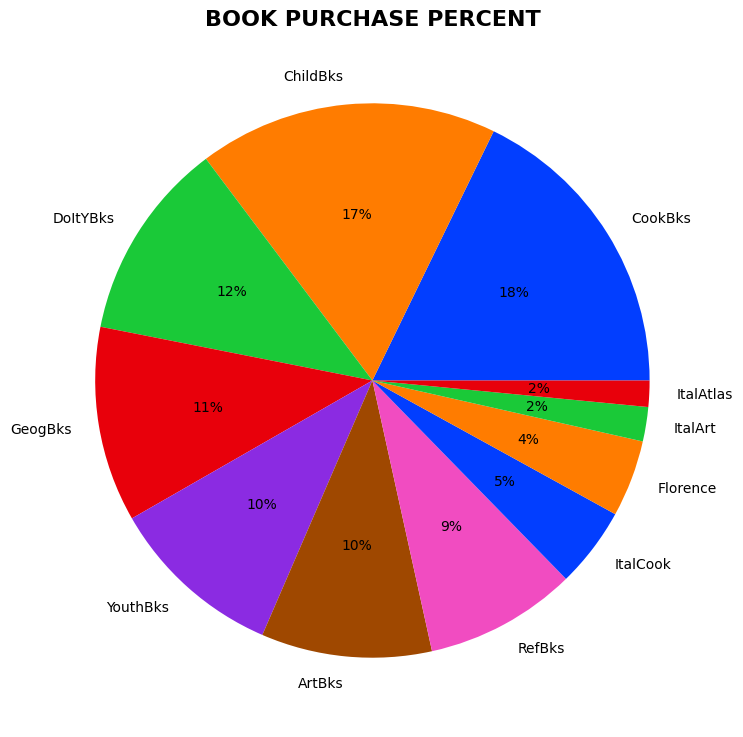

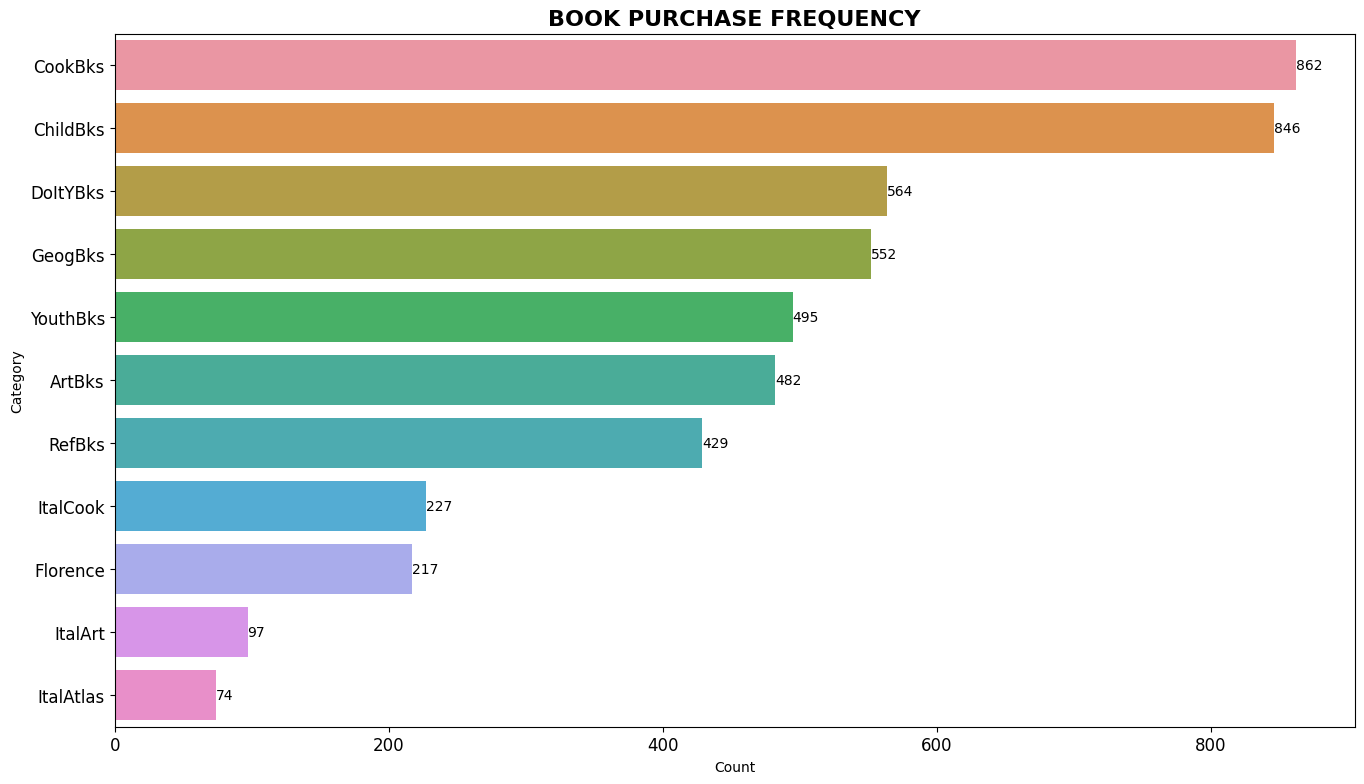

In [261]:
# Segregation of the book_data break-up
import matplotlib.pyplot as plt
import seaborn as sns


palette_color = sns.color_palette('bright')[0:7]
plt.figure(figsize = (20,9))
plt.pie(col_cnt_df['Count'], labels=col_cnt_df['Category'], colors=palette_color, autopct='%.0f%%')
plt.title('BOOK PURCHASE PERCENT',  fontsize = 16, fontweight = 'bold')
plt.show()

plt.figure(figsize = (16,9))
bar_plot = sns.barplot(x = 'Count', y = 'Category', data= col_cnt_df)
plt.yticks(rotation = 0, fontsize = 12)
plt.xticks(rotation = 0, fontsize = 12)
plt.title('BOOK PURCHASE FREQUENCY', fontsize = 16, fontweight = 'bold')
for i in bar_plot.containers:
    bar_plot.bar_label(i,)
plt.show()



## **Support and Length** ##

#### **Using Single product categories** ####

In [262]:
# Product Frequency / Total Sales
first_iter = pd.DataFrame(book_data.sum() / book_data.shape[0], columns = ["Support"]).sort_values("Support", ascending = False)
length_1 = pd.DataFrame(book_data.sum() / book_data.shape[0], columns = ["Support"]).sort_values("Support", ascending = False)
length_1.reset_index(inplace=True)
length_1 = length_1.rename(columns = {'index':'Book_Category'})
length_1

,Book_Category,Support
0,CookBks,0.4310
1,ChildBks,0.4230
2,DoItYBks,0.2820
3,GeogBks,0.2760
4,YouthBks,0.2475
5,ArtBks,0.2410
6,RefBks,0.2145
7,ItalCook,0.1135
8,Florence,0.1085
9,ItalArt,0.0485


In [263]:
# We can choose from the dataset 'length_1' to eliminate based on the support value
treshold = [0.1, 0.15, 0.20]

for t in treshold:
    print(f"DataSet with treshold > {t}:\n{length_1[length_1.Support >= t]}\n")

DataSet with treshold > 0.1:
  Book_Category  Support
0       CookBks   0.4310
1      ChildBks   0.4230
2      DoItYBks   0.2820
3       GeogBks   0.2760
4      YouthBks   0.2475
5        ArtBks   0.2410
6        RefBks   0.2145
7      ItalCook   0.1135
8      Florence   0.1085

DataSet with treshold > 0.15:
  Book_Category  Support
0       CookBks   0.4310
1      ChildBks   0.4230
2      DoItYBks   0.2820
3       GeogBks   0.2760
4      YouthBks   0.2475
5        ArtBks   0.2410
6        RefBks   0.2145

DataSet with treshold > 0.2:
  Book_Category  Support
0       CookBks   0.4310
1      ChildBks   0.4230
2      DoItYBks   0.2820
3       GeogBks   0.2760
4      YouthBks   0.2475
5        ArtBks   0.2410
6        RefBks   0.2145



#### **Using Combination of 2 product categories** ####

In [264]:
# Using itertools package to create combinations of 2 product categories
# importing itertools package

import itertools

temp_list = list(itertools.combinations(first_iter.index, 2))
temp_list = [list(i) for i in temp_list]
# Sample of combinations
temp_list[:10]


# Finding support values
value = []
for i in (temp_list):
    temp = book_data.T.loc[i].sum() # Transposing and getting the sum count
    temp = len(temp[temp == book_data.T.loc[i].shape[0]]) / book_data.shape[0]
    value.append(temp)

# Create a data frame            
second_iter = pd.DataFrame(value, columns = ["Support"])
second_iter["index"] = [tuple(i) for i in temp_list]
second_iter
second_iter['length'] = second_iter['index'].apply(lambda x:len(x))
second_iter = second_iter.set_index("index").sort_values("Support", ascending = False)

# Elimination by Support Value
second_iter = second_iter[second_iter.Support > 0.1]
second_iter


,Support,length
index,,
"(CookBks, ChildBks)",0.2560,2
"(ChildBks, GeogBks)",0.1950,2
"(CookBks, GeogBks)",0.1925,2
"(CookBks, DoItYBks)",0.1875,2
"(ChildBks, DoItYBks)",0.1840,2
"(CookBks, ArtBks)",0.1670,2
"(ChildBks, YouthBks)",0.1650,2
"(ChildBks, ArtBks)",0.1625,2
"(CookBks, YouthBks)",0.1620,2


## **Apriori Algorithm** ##

### **1. Association Rule with 10% Support value i.e., 0.1 and 70% confidence** ###

#### ***Association Rule with 10% Support value i.e., 0.1*** ####

##### *Support and Length* #####

In [265]:
# Identifying the frequent items using Association rule with 10% Support
book_ar=apriori(book_data,min_support=0.1,use_colnames=True)
book_ar['length'] = book_ar['itemsets'].apply(lambda x: len(x))
book_ar

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.1135,(ItalCook),1
8,0.1085,(Florence),1
9,0.1650,"(YouthBks, ChildBks)",2


In [266]:
book_ar[book_ar['length']==1].sort_values(by='support',ascending=False, ignore_index=True).head(5)

,support,itemsets,length
0,0.4310,(CookBks),1
1,0.4230,(ChildBks),1
2,0.2820,(DoItYBks),1
3,0.2760,(GeogBks),1
4,0.2475,(YouthBks),1


In [267]:
book_ar[book_ar['length']==2].sort_values(by='support',ascending=False, ignore_index=True).head(5)

,support,itemsets,length
0,0.2560,"(ChildBks, CookBks)",2
1,0.1950,"(GeogBks, ChildBks)",2
2,0.1925,"(GeogBks, CookBks)",2
3,0.1875,"(DoItYBks, CookBks)",2
4,0.1840,"(DoItYBks, ChildBks)",2


In [268]:
book_ar[book_ar['length']==3].sort_values(by='support',ascending=False, ignore_index=True).head(5)

,support,itemsets,length
0,0.1495,"(GeogBks, ChildBks, CookBks)",3
1,0.1460,"(DoItYBks, ChildBks, CookBks)",3
2,0.1290,"(YouthBks, ChildBks, CookBks)",3
3,0.1265,"(ArtBks, ChildBks, CookBks)",3
4,0.1225,"(RefBks, ChildBks, CookBks)",3


##### **INFERENCE:** #####
**Length = 1: Individual book categories**
Most frequent **Individual** books bought are : **Cooking books** followed by **Child books**

**Length = 2: Combination of 2 book categories**
The most frequent bought books in **Double combinations** are - **(CookBks, ChildBks)** followed by **(ChildBks, GeogBks)** and then **(CookBks, GeogBks)**

**Length = 3: Combination of 3 book categories**
The most frequent bought books in **Triple combinations** are - **(GeogBks, CookBks, ChildBks)** followed by **(CookBks, DoItYBks, ChildBks)** and then **(CookBks, YouthBks, ChildBks)**

### ***Association Rule with 10% Support value i.e., 0.1 and different confidence percentages including 70% confidence*** ###
Checking for rules derived from the frequent itemsets only if the level of confidence is above the 70 percent threshold (min_threshold=0.7):

##### ***Tweeking Confidence min_threshold for 0.3, 0.5, 0.6 and 0.7*** #####

#### *Confidence min_threshold > 0.3* ####

In [269]:
# If we are interested in rules that have a confidence score of >= 0.3

from mlxtend.frequent_patterns import association_rules

rules_conf1 = association_rules(book_ar, metric="confidence", min_threshold=0.3)
rules_conf1.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750,0.633449
2,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240,0.498856
3,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069,0.505870
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.184,0.652482,1.542511,0.064714,1.660347,0.489842


The **''antecedent support'**' column gives us the probability of antecedent products alone
The **''consequent support'**' column gives us the probability of consequent products alone

The **''support'**' column gives us the probability of the two products (i.e., 'antecedent' & 'consequent') occuring together
+ support(A→C)=support(A∪C),range: [0,1]
+ (Number of transactions in which A and C occur together) / (Total number of transactions)

The **'confidence'**' is the probability of seeing the consequent in a transaction given that it also contains the antecedent.
In other words, the confidence of A→C indicates when A occurs, what is the probability that B will also occur.
+ confidence(A→C)=support(A→C)support(A), range: [0,1]
+ (Number of transactions in which A and B occur together) / (Number of transactions in which A occurs)

The **'lift'** is the interestingness measure, used to measure how much more often the antecedent and consequent of a rule A->C occur together than we would expect if they were statistically independent. **Lift value of greater than 1 indicates high correlation between the items**.
+ lift(A→C)=confidence(A→C)support(C),range: [0,∞]
+ (Number of transactions in which A and C occur together) / (Number of transactions in which C occurs)

The **'leverage'** computes the difference between the observed frequency of A and C appearing together and the frequency that would be expected if A and C were independent. **A leverage value of 0 indicates independence**.
+ levarage(A→C)=support(A→C)−support(A)×support(C),range: [−1,1]

The **'conviction'** determines the dependecy on the antecedent. **A high conviction value means that the consequent is highly depending on the antecedent**. For instance, in the case of a perfect confidence score, the denominator becomes 0 (due to 1 - 1) for which the conviction score is defined as 'inf'. Similar to lift, if items are independent, the conviction is 1.
+ conviction(A→C)=1−support(C)1−confidence(A→C),range: [0,∞]

The **'zhangs_metric'** metric measures both association and dissociation. Value ranges between -1 and 1. **A positive value (>0) indicates Association and negative value indicated dissociation**.
+ zhangs metric(A→C)=confidence(A→C)−confidence(A′→C)Max[confidence(A→C),confidence(A′→C)],range: [−1,1]


In [270]:
rules_conf1.sort_values(by='confidence',ascending=False, ignore_index=True).head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf,0.641850
1,"(ArtBks, DoItYBks)",(CookBks),0.1235,0.431,0.1015,0.821862,1.906873,0.048272,3.194159,0.542591
2,"(DoItYBks, GeogBks)",(CookBks),0.1325,0.431,0.1085,0.818868,1.899926,0.051392,3.141354,0.546010
3,"(ArtBks, GeogBks)",(CookBks),0.1275,0.431,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
4,"(ChildBks, RefBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534,0.550345


##### **INFERENCE:** #####
- The highest confidence is for purchase of **CookBks** if **ItalCook** is purchased. The support value is 11%.
- This is followed by the purchase of **CookBks** if the combination of **(DoItYBks, ArtBks)** where purchased. Also, **CookBks** if the combination of **(DoItYBks, GeogBks)** were purchased. Also, **CookBks** if the combination of **(GeogBks, ArtBks)** where purchased. Also, **CookBks** if the combination of **(ChildBks, RefBks)** where purchased. They all possess almost the same confidence and support values.
- The lift values fo the top 5 records are greater than 1 indicates high correlation between the items i.e., the 'antecedents' and 'consequents'

Text(0.5, 1.0, 'Rules with min_threshold > 0.3')

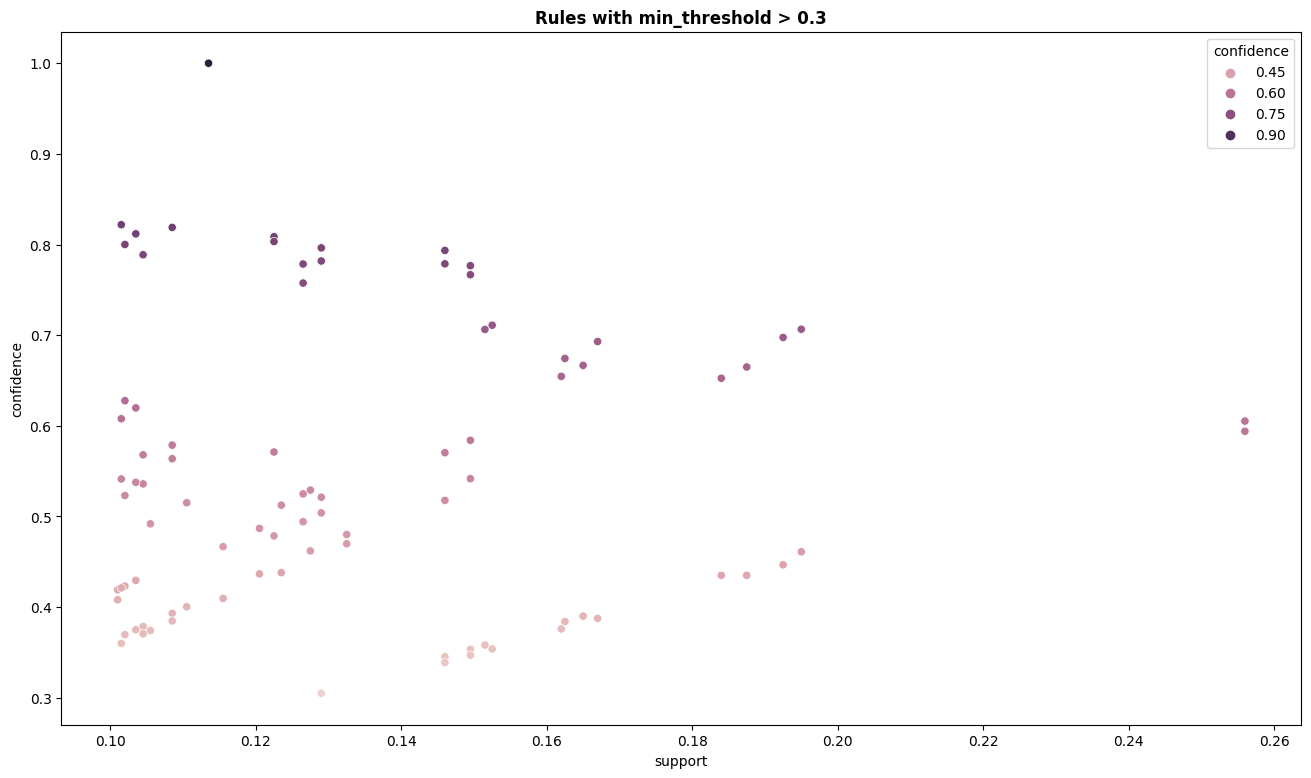

In [271]:
# Visualization of obtained rule# visualization of obtained rule
plt.figure(figsize=(16,9))
import seaborn as sns
sns.scatterplot(data=rules_conf1, x="support", y="confidence", hue="confidence")
plt.title("Rules with min_threshold > 0.3", fontsize = 'large', fontweight = 'bold')

<Axes: title={'center': 'LIFT'}, xlabel='lift', ylabel='Count'>

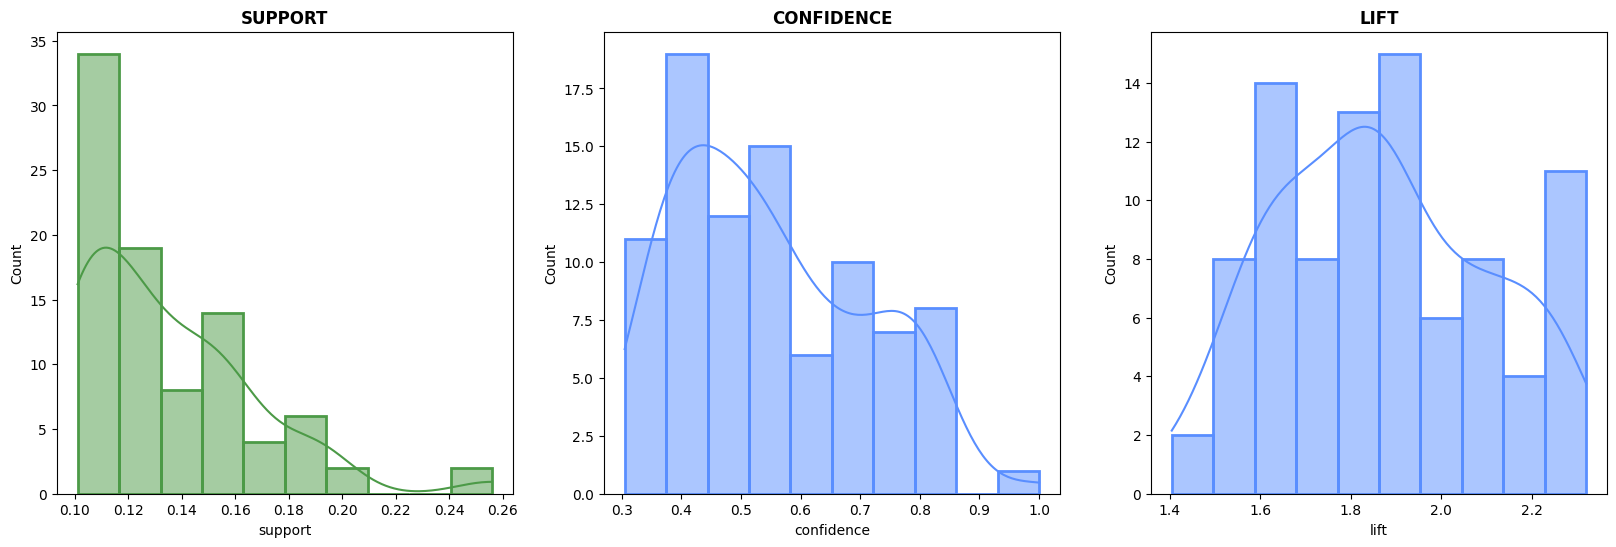

In [272]:
# Visualization of obtained rule using Seaborn
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.title("SUPPORT",fontsize='large',fontweight='bold')
sns.histplot(rules_conf1, x='support', color='#4c9a47', edgecolor='#4c9a47', linewidth=2, bins=10, kde=True)

plt.subplot(1,3,2)
plt.title("CONFIDENCE",fontsize='large',fontweight='bold')
sns.histplot(rules_conf1, x='confidence', color='#598eff', edgecolor='#598eff', linewidth=2, bins=10, kde=True)

plt.subplot(1,3,3)
plt.title("LIFT",fontsize='large',fontweight='bold')
sns.histplot(rules_conf1, x='lift', color='#598eff', edgecolor='#598eff', linewidth=2, bins=10, kde=True)

#### *Confidence min_threshold > 0.5* ####

In [273]:
# If we are interested in rules that have a confidence score of >= 0.5

from mlxtend.frequent_patterns import association_rules

rules_conf2 = association_rules(book_ar, metric="confidence", min_threshold=0.5)
rules_conf2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(CookBks),0.4230,0.431,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
2,(CookBks),(ChildBks),0.4310,0.423,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
3,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
4,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548,0.510629


Text(0.5, 1.0, 'Rules with min_threshold > 0.5')

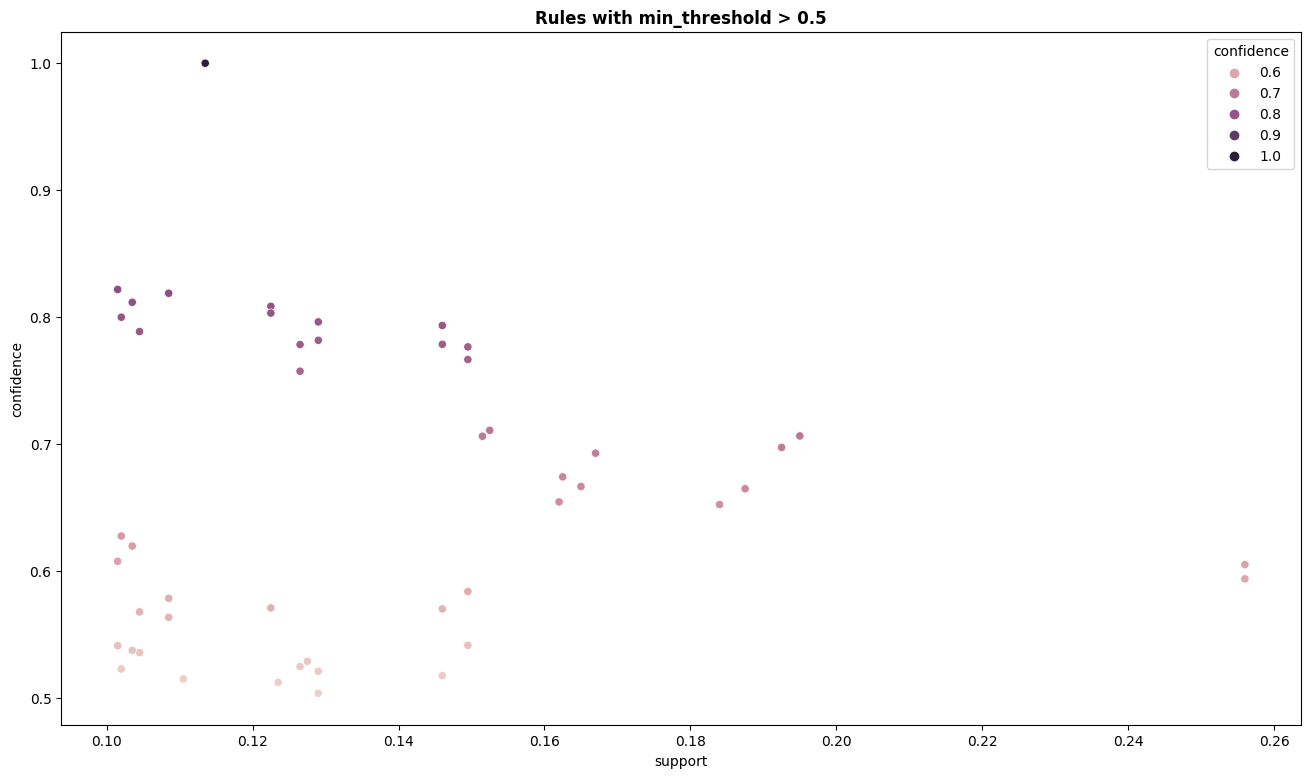

In [274]:
# Visualization of obtained rule
plt.figure(figsize=(16,9))
import seaborn as sns
sns.scatterplot(data=rules_conf2, x="support", y="confidence", hue="confidence")
plt.title("Rules with min_threshold > 0.5", fontsize = 'large', fontweight = 'bold')

<Axes: title={'center': 'LIFT'}, xlabel='lift', ylabel='Count'>

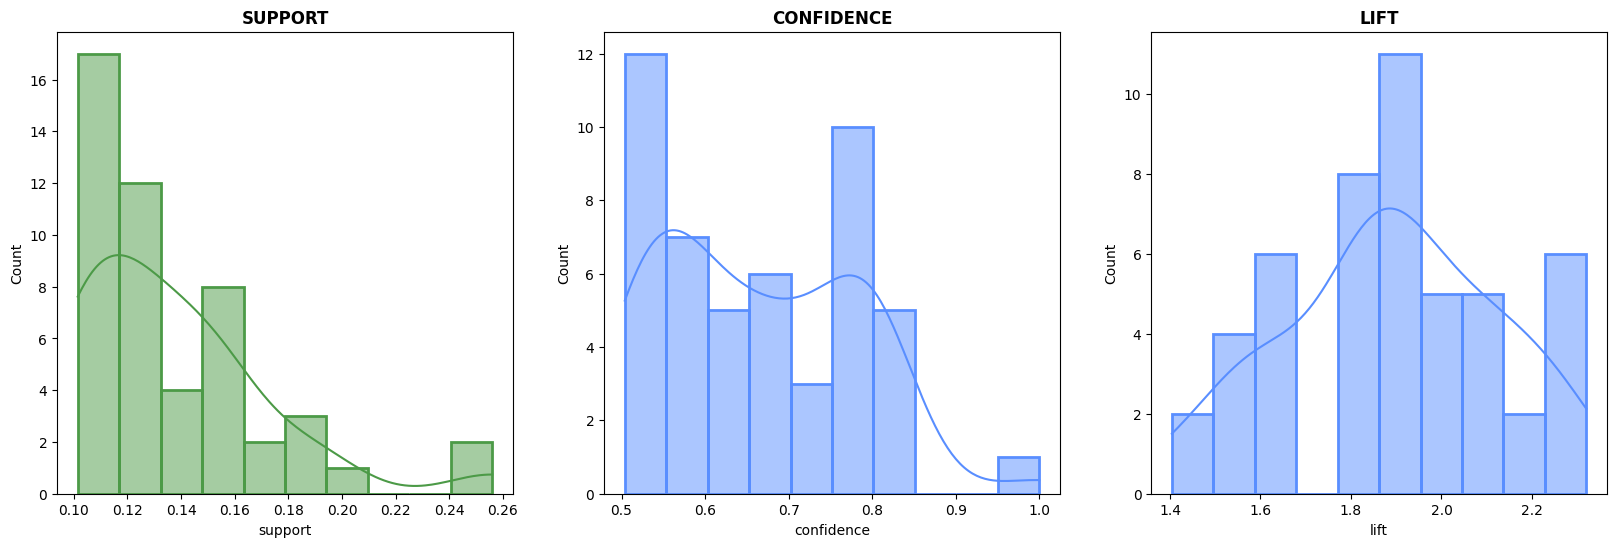

In [275]:
# Visualization of obtained rule using Seaborn
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.title("SUPPORT",fontsize='large',fontweight='bold')
sns.histplot(rules_conf2, x='support', color='#4c9a47', edgecolor='#4c9a47', linewidth=2, bins=10, kde=True)

plt.subplot(1,3,2)
plt.title("CONFIDENCE",fontsize='large',fontweight='bold')
sns.histplot(rules_conf2, x='confidence', color='#598eff', edgecolor='#598eff', linewidth=2, bins=10, kde=True)

plt.subplot(1,3,3)
plt.title("LIFT",fontsize='large',fontweight='bold')
sns.histplot(rules_conf2, x='lift', color='#598eff', edgecolor='#598eff', linewidth=2, bins=10, kde=True)


#### *Confidence min_threshold > 0.6* ####

In [276]:
# If we are interested in rules that have a confidence score of >= 0.6

from mlxtend.frequent_patterns import association_rules

rules_conf3 = association_rules(book_ar, metric="confidence", min_threshold=0.6)
rules_conf3.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(CookBks),0.4230,0.431,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
2,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
3,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548,0.510629
4,(ArtBks),(ChildBks),0.2410,0.423,0.1625,0.674274,1.594028,0.060557,1.771427,0.490986


Text(0.5, 1.0, 'Rules with min_threshold > 0.6')

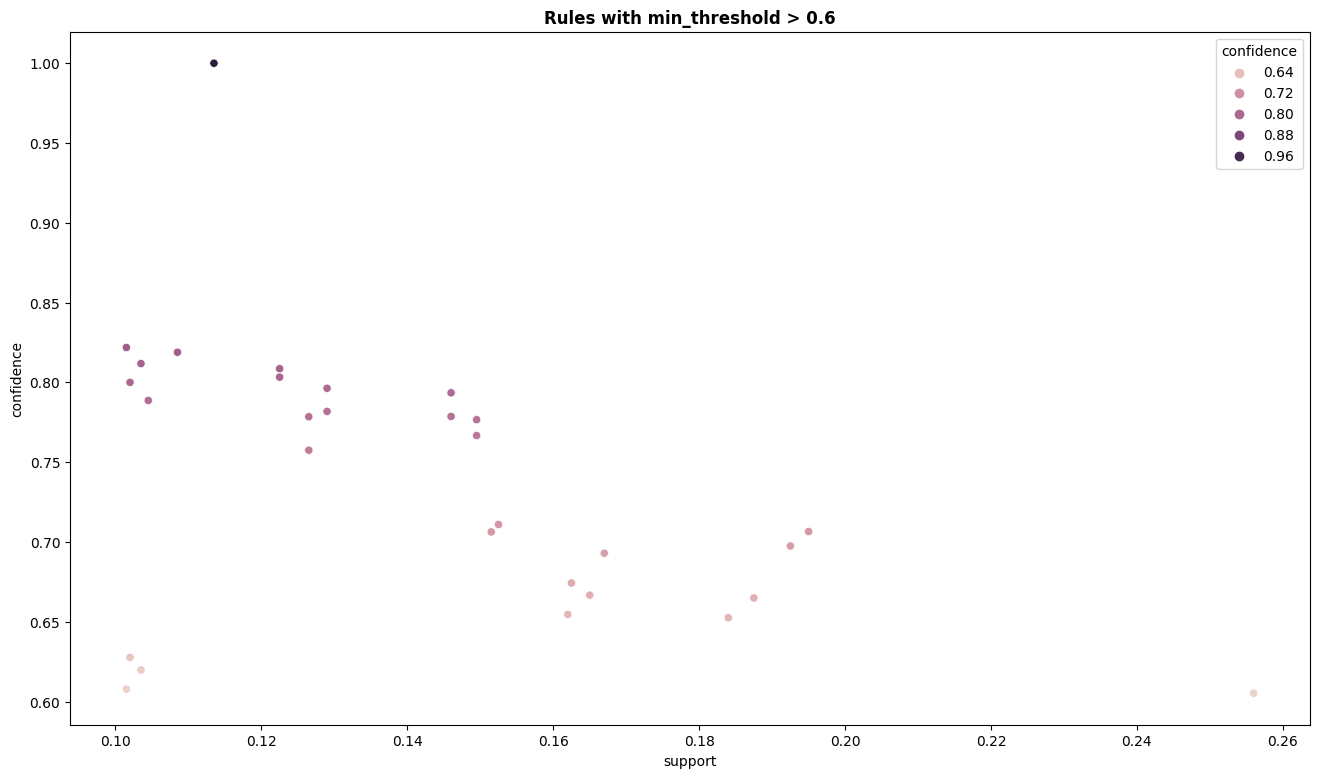

In [277]:
# Visualization of obtained rule# visualization of obtained rule
plt.figure(figsize=(16,9))
import seaborn as sns
sns.scatterplot(data=rules_conf3, x="support", y="confidence", hue="confidence")
plt.title("Rules with min_threshold > 0.6", fontsize = 'large', fontweight = 'bold')

<Axes: title={'center': 'LIFT'}, xlabel='lift', ylabel='Count'>

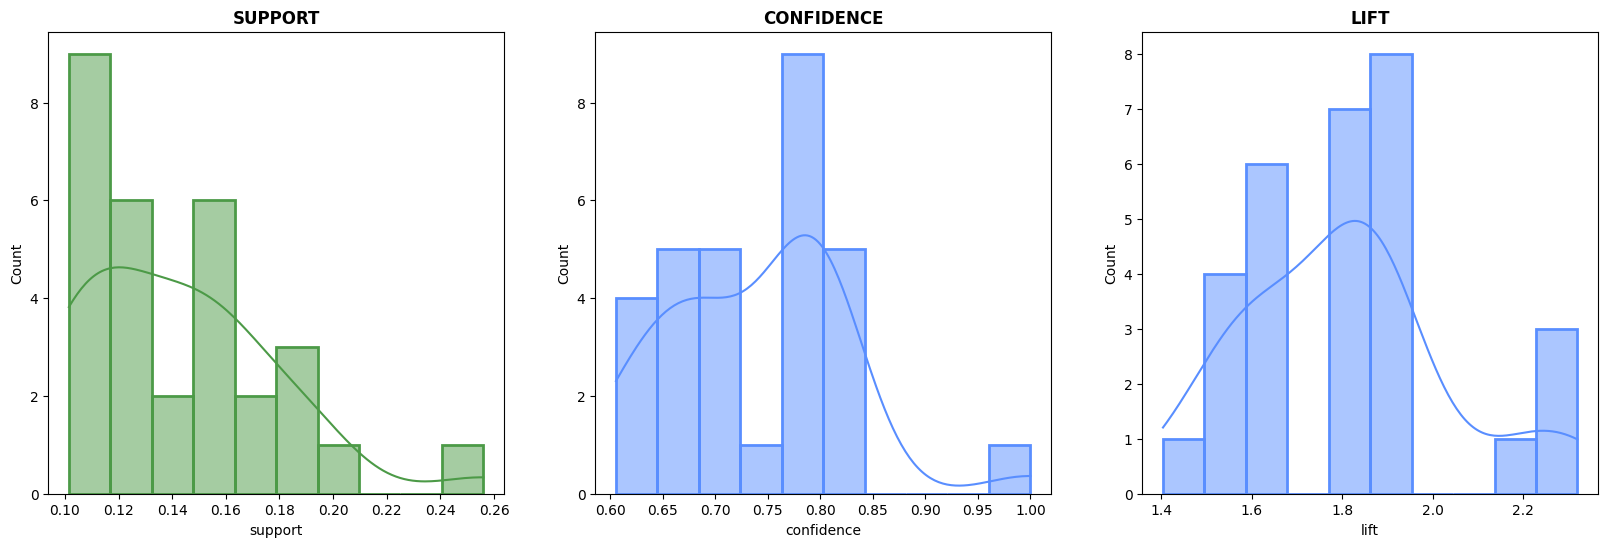

In [278]:
# Visualization of obtained rule using Seaborn
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.title("SUPPORT",fontsize='large',fontweight='bold')
sns.histplot(rules_conf3, x='support', color='#4c9a47', edgecolor='#4c9a47', linewidth=2, bins=10, kde=True)

plt.subplot(1,3,2)
plt.title("CONFIDENCE",fontsize='large',fontweight='bold')
sns.histplot(rules_conf3, x='confidence', color='#598eff', edgecolor='#598eff', linewidth=2, bins=10, kde=True)

plt.subplot(1,3,3)
plt.title("LIFT",fontsize='large',fontweight='bold')
sns.histplot(rules_conf3, x='lift', color='#598eff', edgecolor='#598eff', linewidth=2, bins=10, kde=True)

#### *Confidence min_threshold > 0.7* ####

In [279]:
# If we are interested in rules that have a lift score of >= 0.7

from mlxtend.frequent_patterns import association_rules

rules_conf4 = association_rules(book_ar, metric="confidence", min_threshold=0.7)
rules_conf4.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548,0.510629
1,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074,0.554271
2,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556,0.501303
3,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf,0.641850
4,"(YouthBks, ChildBks)",(CookBks),0.1650,0.431,0.1290,0.781818,1.813963,0.057885,2.607917,0.537390


Text(0.5, 1.0, 'Rules with min_threshold > 0.7')

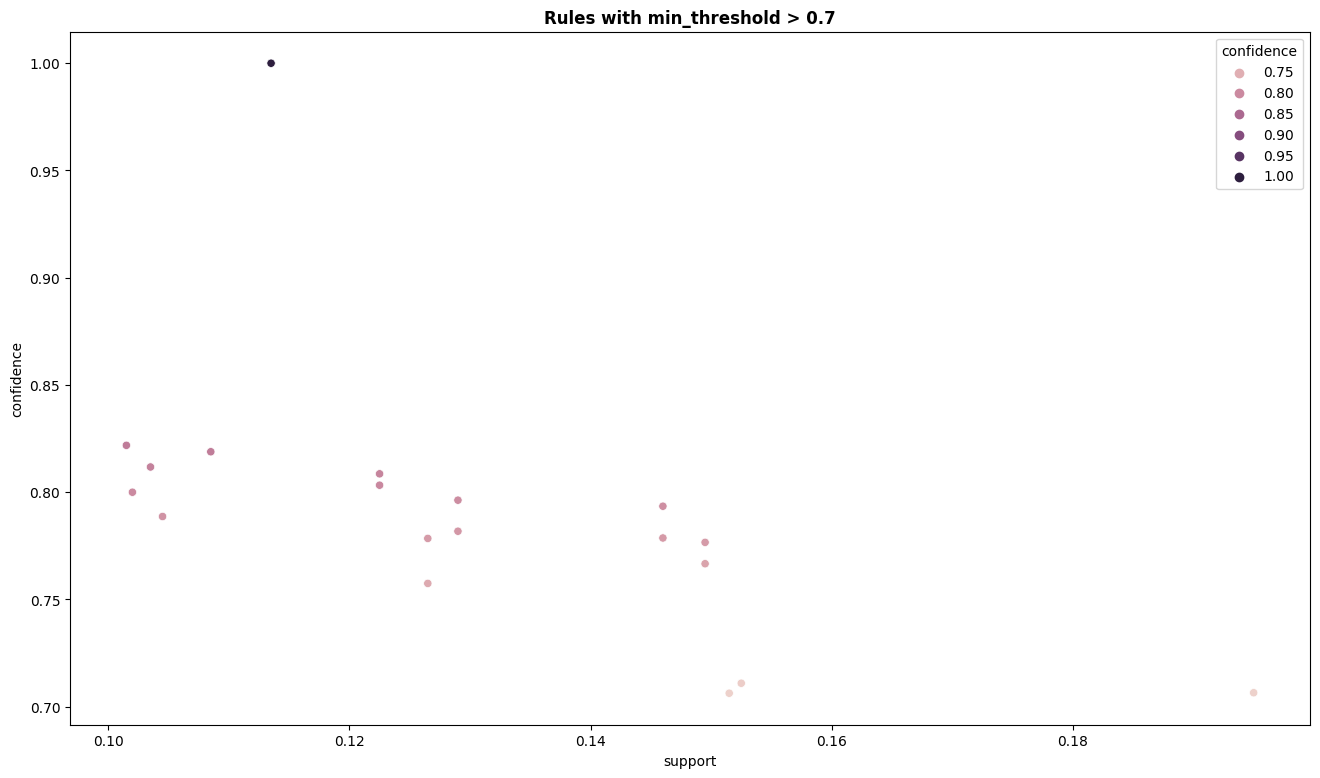

In [280]:
# Visualization of obtained rule# visualization of obtained rule
plt.figure(figsize=(16,9))
import seaborn as sns
sns.scatterplot(data=rules_conf4, x="support", y="confidence", hue="confidence")
plt.title("Rules with min_threshold > 0.7", fontsize = 'large', fontweight = 'bold')

<Axes: title={'center': 'LIFT'}, xlabel='lift', ylabel='Count'>

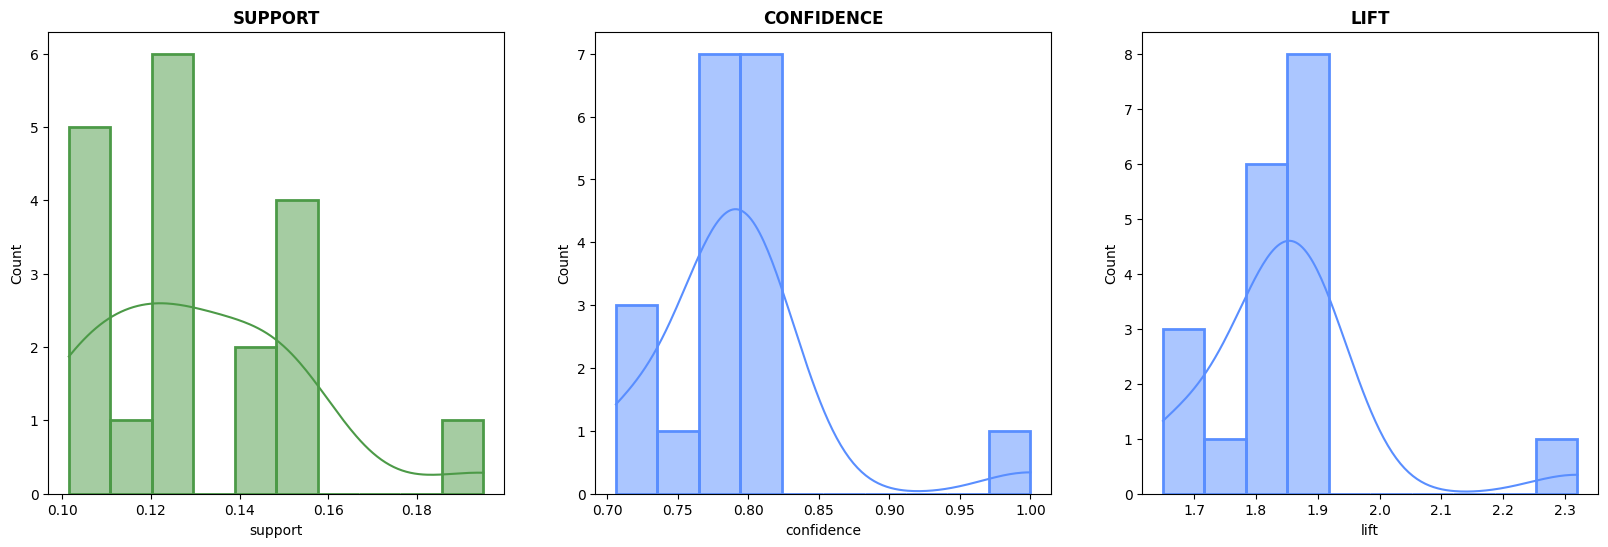

In [281]:
# Visualization of obtained rule using Seaborn
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.title("SUPPORT",fontsize='large',fontweight='bold')
sns.histplot(rules_conf4, x='support', color='#4c9a47', edgecolor='#4c9a47', linewidth=2, bins=10, kde=True)

plt.subplot(1,3,2)
plt.title("CONFIDENCE",fontsize='large',fontweight='bold')
sns.histplot(rules_conf4, x='confidence', color='#598eff', edgecolor='#598eff', linewidth=2, bins=10, kde=True)

plt.subplot(1,3,3)
plt.title("LIFT",fontsize='large',fontweight='bold')
sns.histplot(rules_conf4, x='lift', color='#598eff', edgecolor='#598eff', linewidth=2, bins=10, kde=True)


#### ***Tweeking Lift min_threshold with 2.0 and 2.2*** ####

#### *Lift min_threshold = 2.0* ####

In [282]:
# If we are interested in rules that have a lift minimum threshold as 2.0
rules_lift1 = association_rules(book_ar, metric="lift", min_threshold=2.0)
rules_lift1.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf,0.641850
1,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406,1.000000
2,"(ChildBks, CookBks)",(YouthBks),0.2560,0.2475,0.1290,0.503906,2.035985,0.065640,1.516850,0.683921
3,(YouthBks),"(ChildBks, CookBks)",0.2475,0.2560,0.1290,0.521212,2.035985,0.065640,1.553924,0.676196
4,"(ChildBks, CookBks)",(DoItYBks),0.2560,0.2820,0.1460,0.570312,2.022385,0.073808,1.670982,0.679482


Text(0.5, 1.0, 'Rules with lift minimum threshold = 2.0')

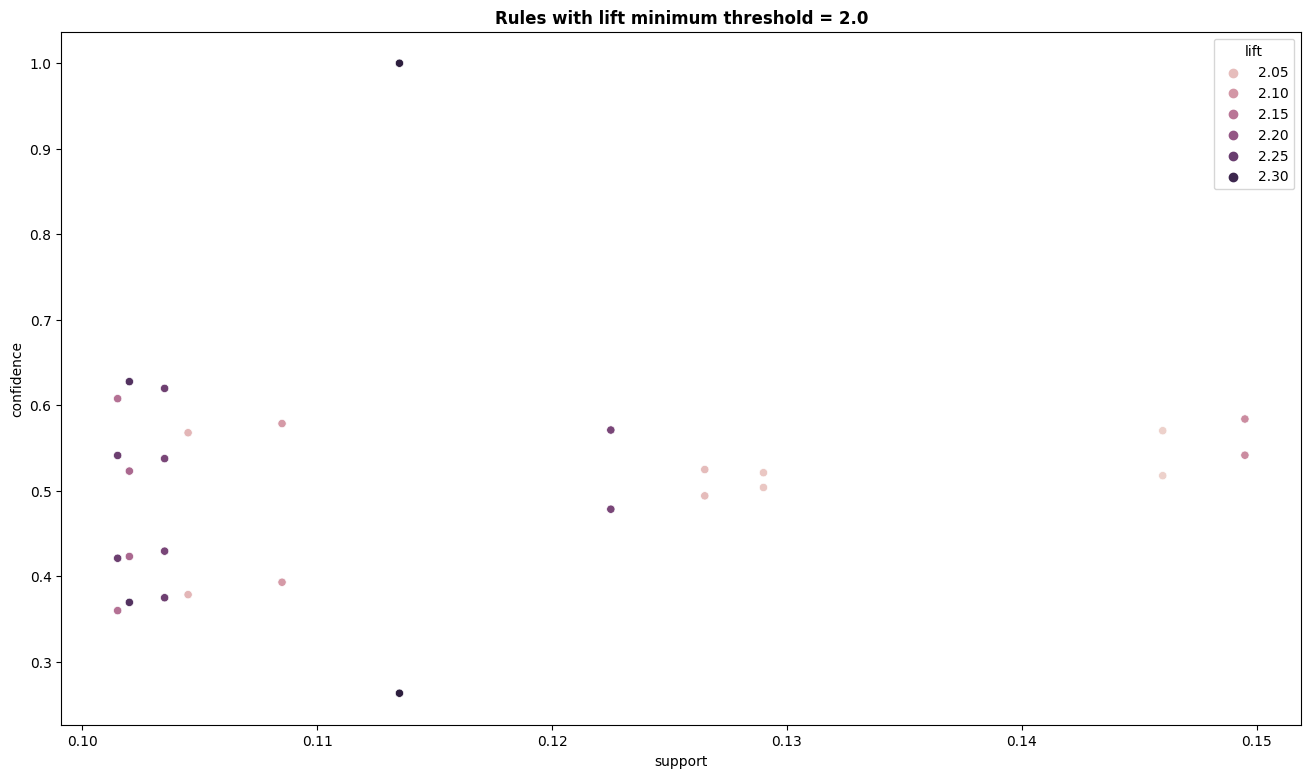

In [283]:
# Visualization of obtained rule# visualization of obtained rule
plt.figure(figsize=(16,9))
import seaborn as sns
sns.scatterplot(data=rules_lift1, x="support", y="confidence", hue="lift")
plt.title("Rules with lift minimum threshold = 2.0", fontsize = 'large', fontweight = 'bold')

<Axes: title={'center': 'LIFT'}, xlabel='lift', ylabel='Count'>

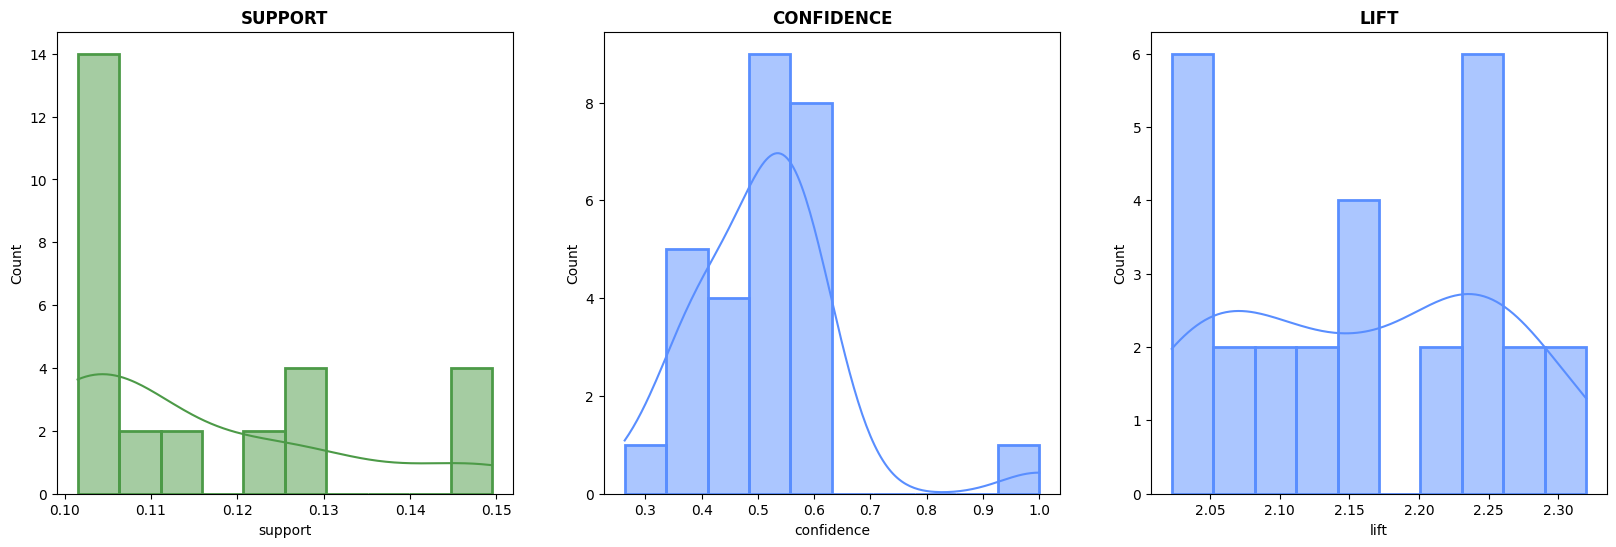

In [284]:
# Visualization of obtained rule using Seaborn
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.title("SUPPORT",fontsize='large',fontweight='bold')
sns.histplot(rules_lift1, x='support', color='#4c9a47', edgecolor='#4c9a47', linewidth=2, bins=10, kde=True)

plt.subplot(1,3,2)
plt.title("CONFIDENCE",fontsize='large',fontweight='bold')
sns.histplot(rules_lift1, x='confidence', color='#598eff', edgecolor='#598eff', linewidth=2, bins=10, kde=True)

plt.subplot(1,3,3)
plt.title("LIFT",fontsize='large',fontweight='bold')
sns.histplot(rules_lift1, x='lift', color='#598eff', edgecolor='#598eff', linewidth=2, bins=10, kde=True)

#### *Lift min_threshold = 2.2* ####

In [285]:
# If we are interested in rules that have a lift score minimum threshold = 2.2
rules_lift2 = association_rules(book_ar, metric="lift", min_threshold=2.2)
rules_lift2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf,0.641850
1,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406,1.000000
2,"(ChildBks, CookBks)",(RefBks),0.2560,0.2145,0.1225,0.478516,2.230842,0.067588,1.506277,0.741584
3,(RefBks),"(ChildBks, CookBks)",0.2145,0.2560,0.1225,0.571096,2.230842,0.067588,1.734652,0.702405
4,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,0.669008
5,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448,0.773887
6,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797,0.682834
7,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674,0.730966
8,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866
9,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,0.683298


Text(0.5, 1.0, 'Rules with lift minimum threshold = 2.2')

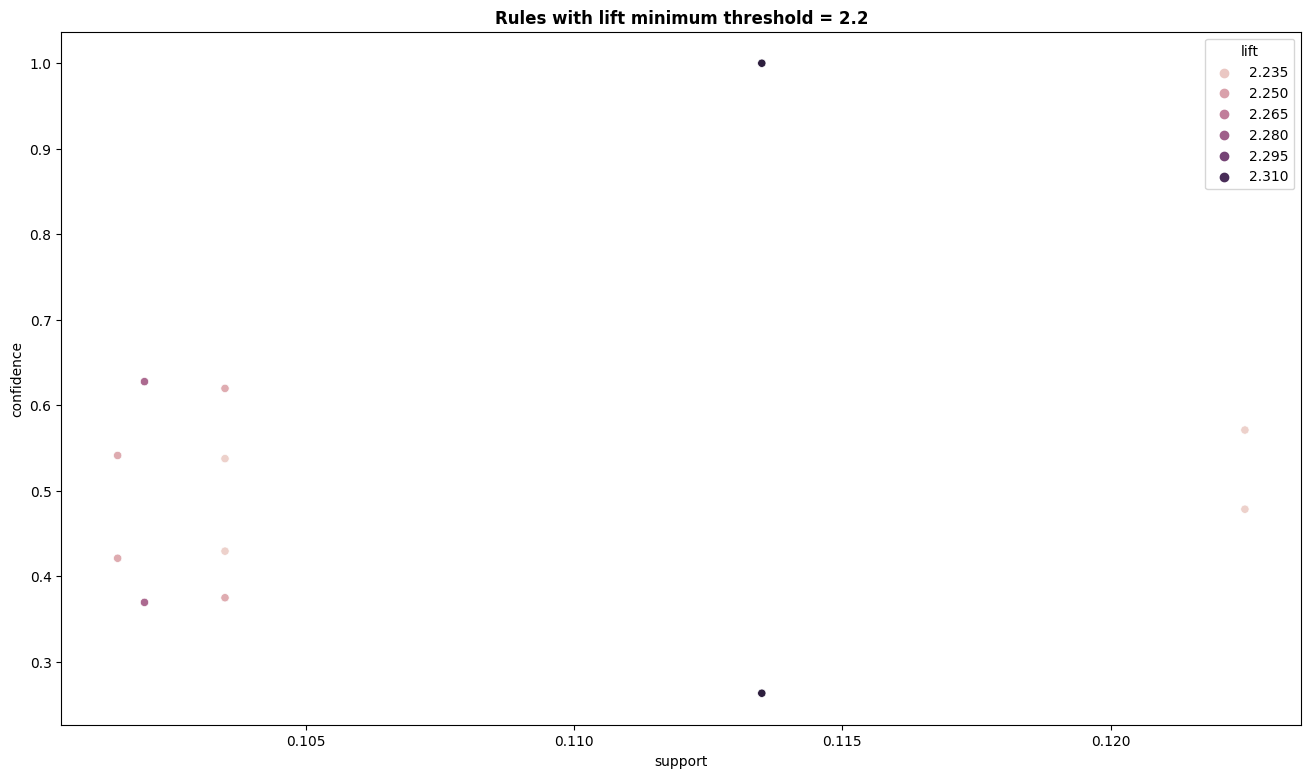

In [286]:
# Visualization of obtained rule
plt.figure(figsize=(16,9))
import seaborn as sns
sns.scatterplot(data=rules_lift2, x="support", y="confidence",hue="lift")
plt.title("Rules with lift minimum threshold = 2.2", fontsize = 'large', fontweight = 'bold')

<Axes: title={'center': 'LIFT'}, xlabel='lift', ylabel='Count'>

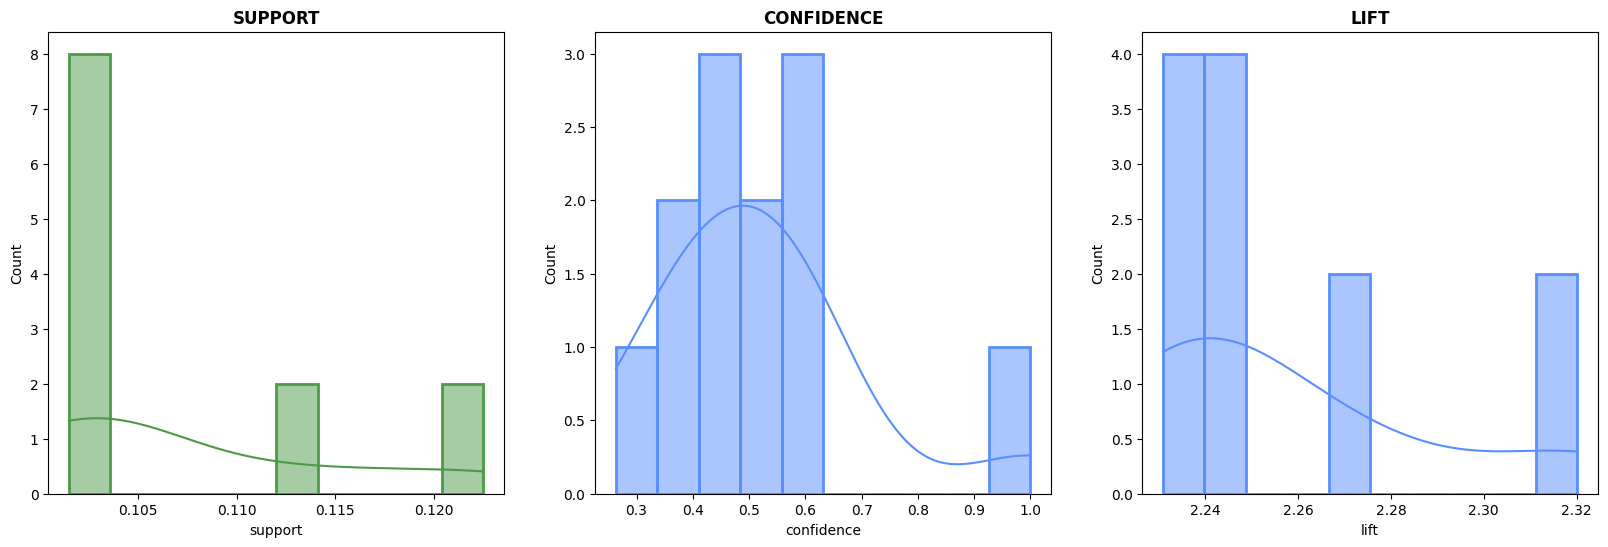

In [287]:
# Visualization of obtained rule using Seaborn
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.title("SUPPORT",fontsize='large',fontweight='bold')
sns.histplot(rules_lift2, x='support', color='#4c9a47', edgecolor='#4c9a47', linewidth=2, bins=10, kde=True)

plt.subplot(1,3,2)
plt.title("CONFIDENCE",fontsize='large',fontweight='bold')
sns.histplot(rules_lift2, x='confidence', color='#598eff', edgecolor='#598eff', linewidth=2, bins=10, kde=True)

plt.subplot(1,3,3)
plt.title("LIFT",fontsize='large',fontweight='bold')
sns.histplot(rules_lift2, x='lift', color='#598eff', edgecolor='#598eff', linewidth=2, bins=10, kde=True)

### **Tweeking based on conditions to get rules with -** ###
- Support = 7%
- Atleast 2 antecedents
- Confidence score of > 0.7
- Lift score of > 0.7

In [288]:
# Identifying the frequent items using Association rule with 7% Support

book_ar_7=apriori(book_data,min_support=0.07,use_colnames=True)
book_ar_7['length'] = book_ar['itemsets'].apply(lambda x: len(x))
book_ar_7

,support,itemsets,length
0,0.4230,(ChildBks),1.0
1,0.2475,(YouthBks),1.0
2,0.4310,(CookBks),1.0
3,0.2820,(DoItYBks),1.0
4,0.2145,(RefBks),1.0
...,...,...,...
61,0.0745,"(RefBks, DoItYBks, ChildBks, CookBks)",NaN
62,0.0820,"(ArtBks, DoItYBks, ChildBks, CookBks)",NaN
63,0.0890,"(GeogBks, DoItYBks, ChildBks, CookBks)",NaN
64,0.0785,"(RefBks, GeogBks, ChildBks, CookBks)",NaN


In [289]:
# If we are interested in getting rules -
# That have atleast 2 antecedents 
# That have a confidence score of >= 0.7
# That have a lift score of 1.2

from mlxtend.frequent_patterns import association_rules

bk_rules = association_rules(book_ar_7, metric="lift", min_threshold=1.2)
bk_rules = association_rules(book_ar_7, metric="confidence", min_threshold=0.7)
bk_rules["antecedent_len"] = bk_rules["antecedents"].apply(lambda x: len(x))


<Axes: xlabel='support', ylabel='confidence'>

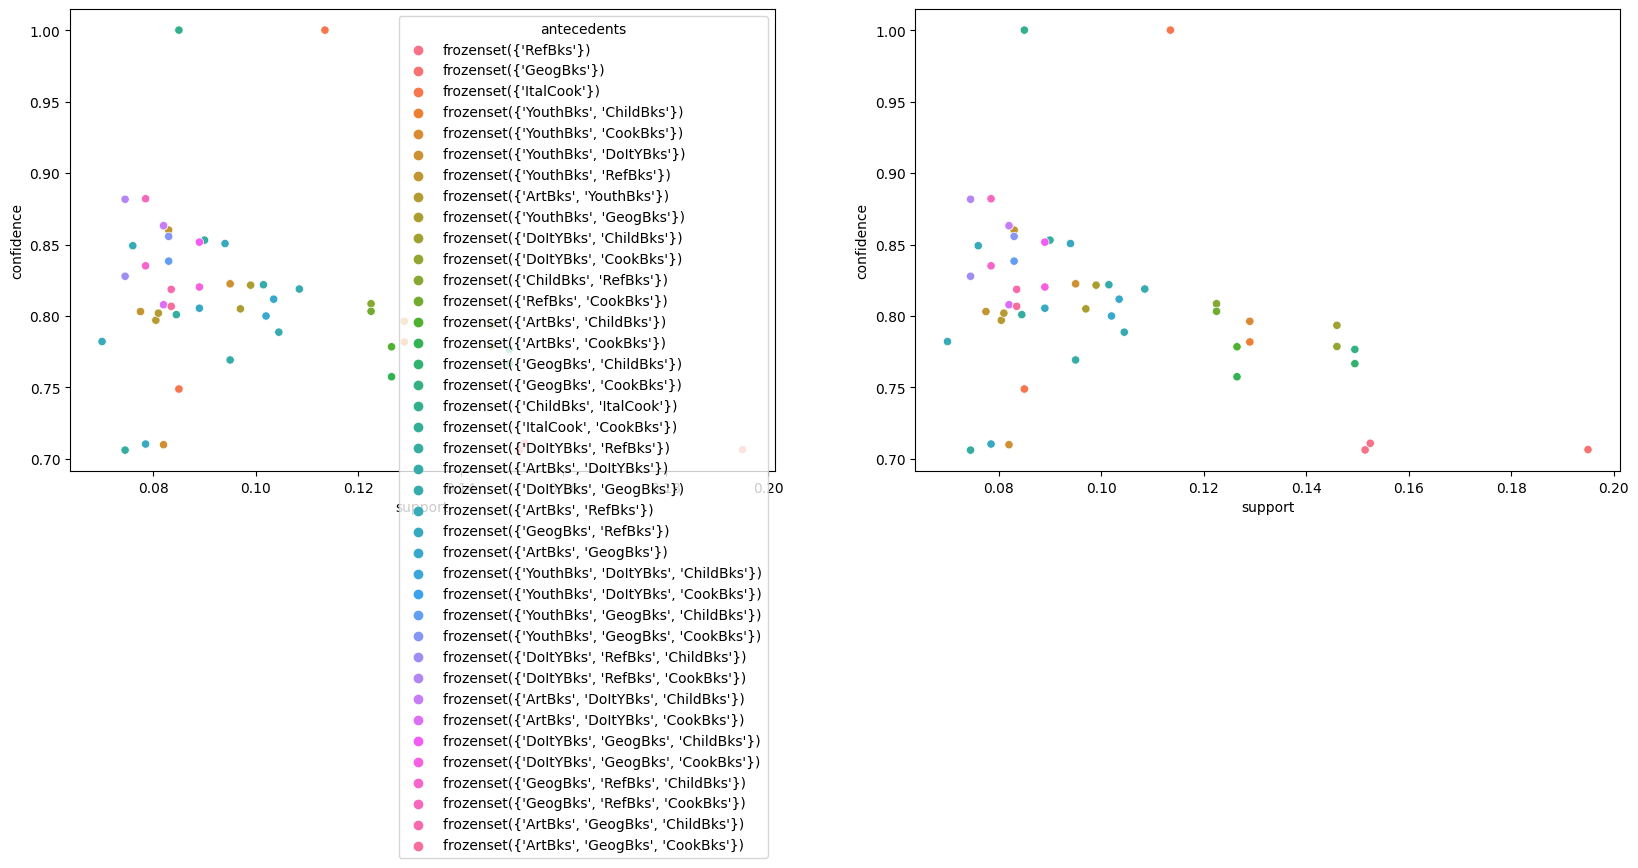

In [290]:
# visualization of obtained rule 'm_rules'

import seaborn as sns
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.scatterplot(data=bk_rules, x="support", y="confidence", hue="antecedents")

# visualization of obtained rule - Withoud Legend
plt.subplot(1,2,2)
sns.scatterplot(data=bk_rules, x="support", y="confidence", hue="antecedents", legend=None)

<Axes: title={'center': 'LIFT'}, xlabel='lift', ylabel='Count'>

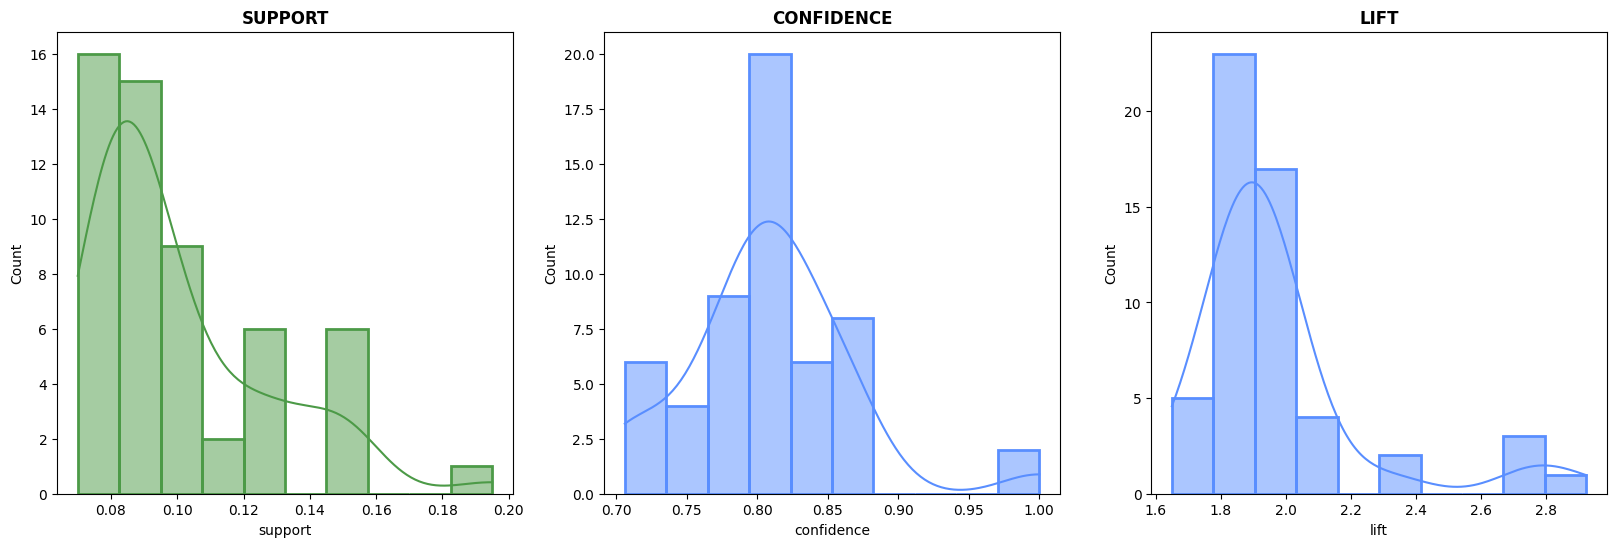

In [291]:
# Visualization of obtained rule using Seaborn
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.title("SUPPORT",fontsize='large',fontweight='bold')
sns.histplot(bk_rules, x='support', color='#4c9a47', edgecolor='#4c9a47', linewidth=2, bins=10, kde=True)

plt.subplot(1,3,2)
plt.title("CONFIDENCE",fontsize='large',fontweight='bold')
sns.histplot(bk_rules, x='confidence', color='#598eff', edgecolor='#598eff', linewidth=2, bins=10, kde=True)

plt.subplot(1,3,3)
plt.title("LIFT",fontsize='large',fontweight='bold')
sns.histplot(bk_rules, x='lift', color='#598eff', edgecolor='#598eff', linewidth=2, bins=10, kde=True)

In [292]:
rules_cond1 = bk_rules[(bk_rules['antecedent_len'] >= 2) &  (bk_rules['confidence'] > 0.75) & (bk_rules['lift'] > 1.2)]
rules_cond1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_len
5,"(YouthBks, ChildBks)",(CookBks),0.1650,0.431,0.1290,0.781818,1.813963,0.057885,2.607917,0.537390,2
6,"(YouthBks, CookBks)",(ChildBks),0.1620,0.423,0.1290,0.796296,1.882497,0.060474,2.832545,0.559416,2
7,"(YouthBks, DoItYBks)",(ChildBks),0.1155,0.423,0.0950,0.822511,1.944470,0.046143,3.250902,0.549148,2
8,"(YouthBks, RefBks)",(ChildBks),0.0965,0.423,0.0830,0.860104,2.033342,0.042181,4.124481,0.562478,2
9,"(ArtBks, YouthBks)",(ChildBks),0.1010,0.423,0.0805,0.797030,1.884231,0.037777,2.842780,0.522002,2
10,"(YouthBks, GeogBks)",(ChildBks),0.1205,0.423,0.0990,0.821577,1.942262,0.048029,3.233884,0.551605,2
11,"(DoItYBks, ChildBks)",(CookBks),0.1840,0.431,0.1460,0.793478,1.841017,0.066696,2.755158,0.559831,2
12,"(DoItYBks, CookBks)",(ChildBks),0.1875,0.423,0.1460,0.778667,1.840820,0.066687,2.606928,0.562171,2
13,"(ChildBks, RefBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534,0.550345,2
14,"(RefBks, CookBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083,0.558594,2


<Axes: xlabel='support', ylabel='confidence'>

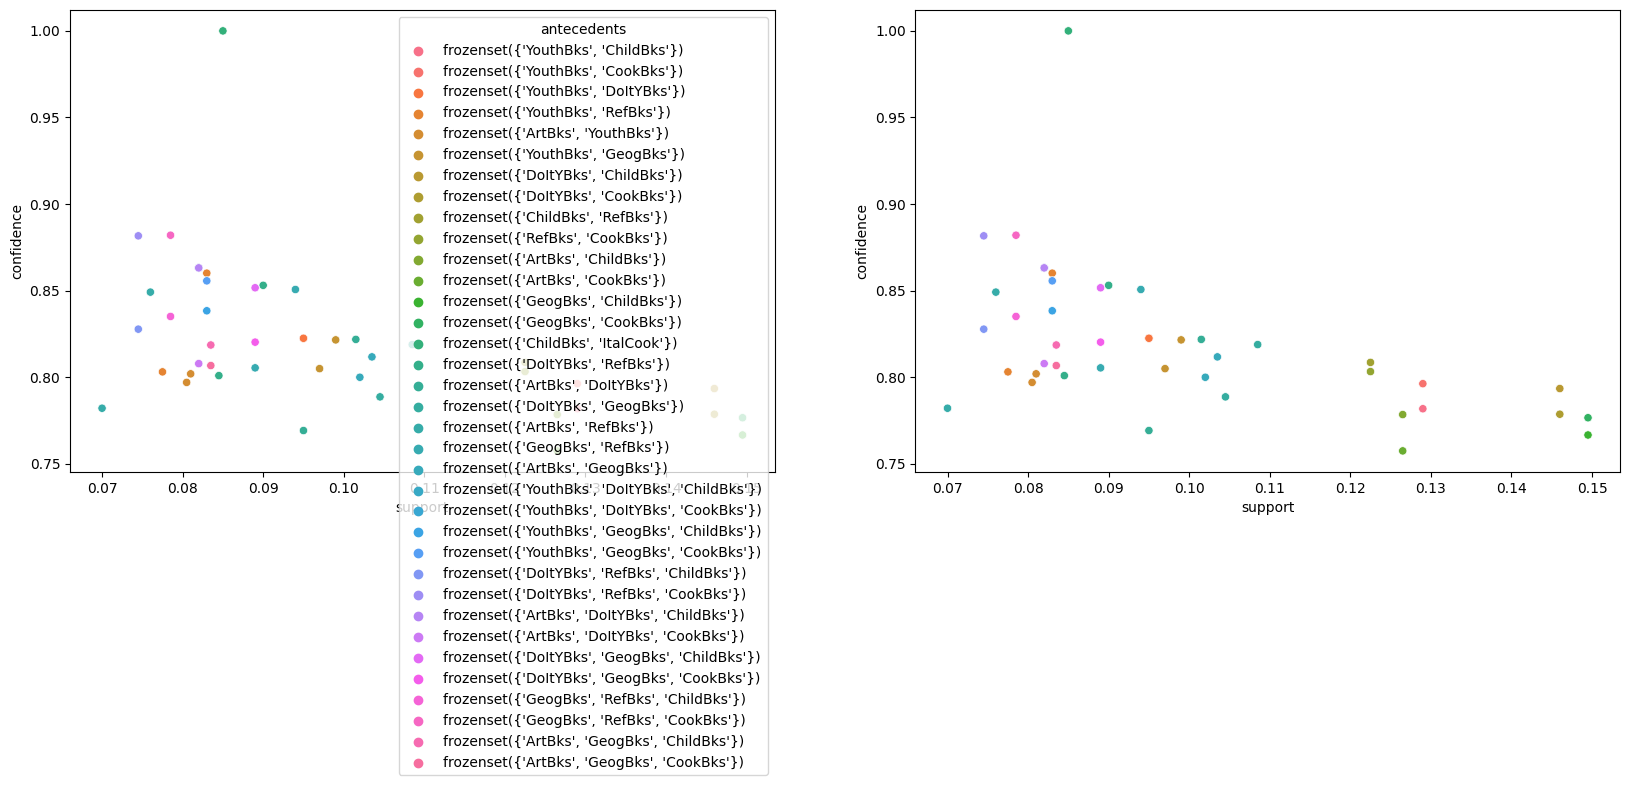

In [293]:
# visualization of obtained rule - With and Without Legend

import seaborn as sns
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.scatterplot(data=rules_cond1, x="support", y="confidence", hue="antecedents")

# visualization of obtained rule - Withoud Legend
plt.subplot(1,2,2)
sns.scatterplot(data=rules_cond1, x="support", y="confidence", hue="antecedents", legend=None)

<Axes: title={'center': 'LIFT'}, xlabel='lift', ylabel='Count'>

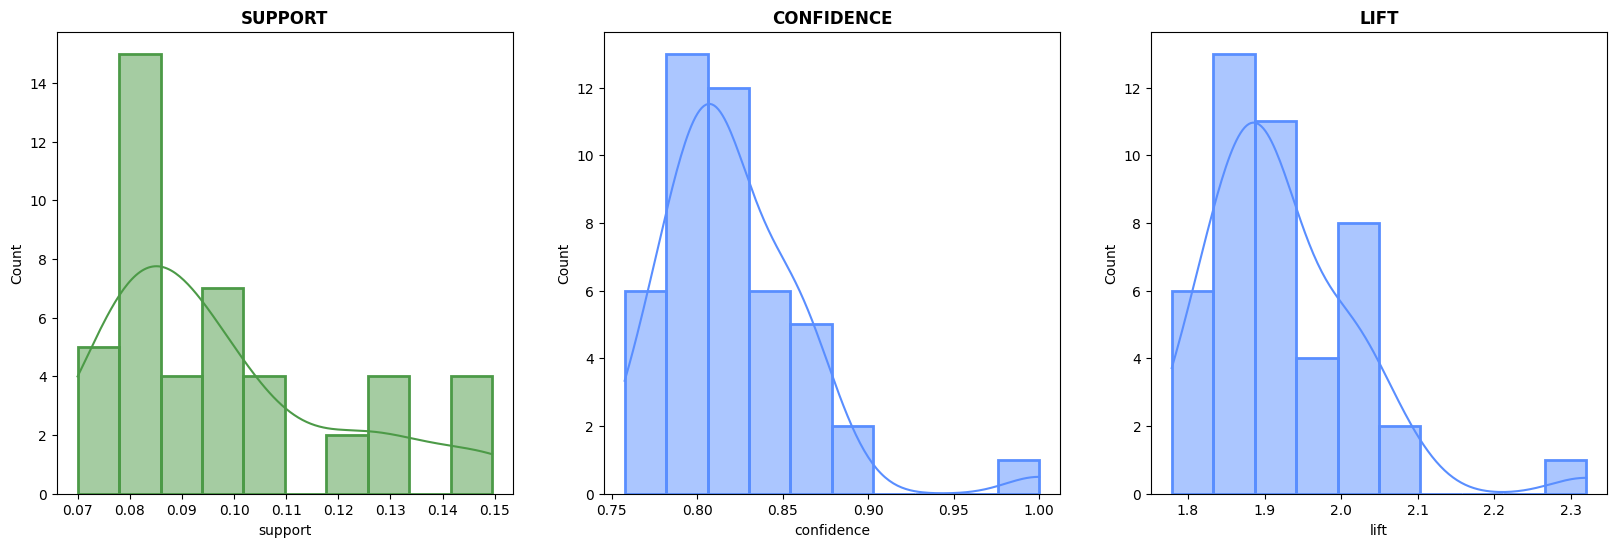

In [294]:
# Visualization of obtained rule using Seaborn
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.title("SUPPORT",fontsize='large',fontweight='bold')
sns.histplot(rules_cond1, x='support', color='#4c9a47', edgecolor='#4c9a47', linewidth=2, bins=10, kde=True)

plt.subplot(1,3,2)
plt.title("CONFIDENCE",fontsize='large',fontweight='bold')
sns.histplot(rules_cond1, x='confidence', color='#598eff', edgecolor='#598eff', linewidth=2, bins=10, kde=True)

plt.subplot(1,3,3)
plt.title("LIFT",fontsize='large',fontweight='bold')
sns.histplot(rules_cond1, x='lift', color='#598eff', edgecolor='#598eff', linewidth=2, bins=10, kde=True)

In [295]:
# If we are interested in getting rules -
# 'antecedents' as CookBks and ArtBks

rules_cond2 = bk_rules[bk_rules['antecedents'] == {'CookBks', 'ArtBks'}]
rules_cond2

# Lift Ratio > 1 is a good influential rule in selecting the associated transactions

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_len
16,"(ArtBks, CookBks)",(ChildBks),0.167,0.423,0.1265,0.757485,1.790745,0.055859,2.379235,0.5301,2


<Axes: xlabel='support', ylabel='confidence'>

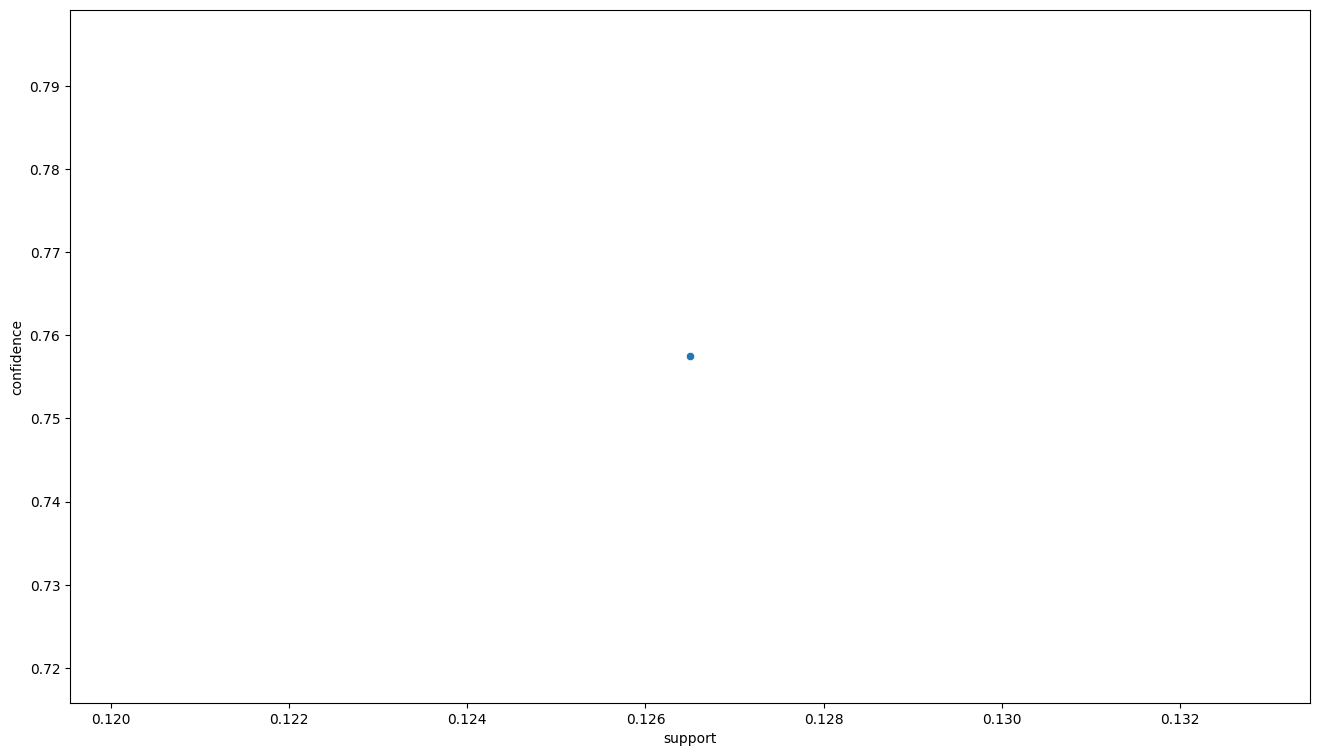

In [296]:
# visualization of obtained rule
plt.figure(figsize=(16,9))
import seaborn as sns
sns.scatterplot(data=rules_cond2, x="support", y="confidence")

<Axes: title={'center': 'LIFT'}, xlabel='lift', ylabel='Count'>

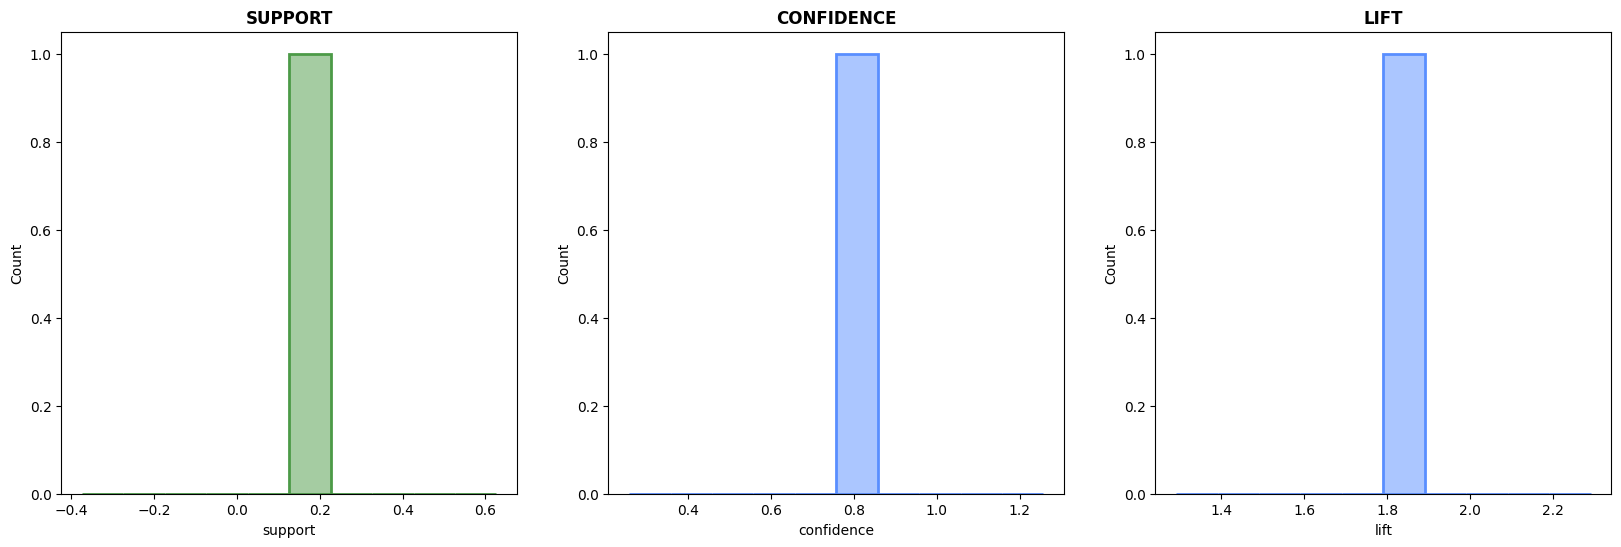

In [297]:
# Visualization of obtained rule using Seaborn
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.title("SUPPORT",fontsize='large',fontweight='bold')
sns.histplot(rules_cond2, x='support', color='#4c9a47', edgecolor='#4c9a47', linewidth=2, bins=10, kde=True)

plt.subplot(1,3,2)
plt.title("CONFIDENCE",fontsize='large',fontweight='bold')
sns.histplot(rules_cond2, x='confidence', color='#598eff', edgecolor='#598eff', linewidth=2, bins=10, kde=True)

plt.subplot(1,3,3)
plt.title("LIFT",fontsize='large',fontweight='bold')
sns.histplot(rules_cond2, x='lift', color='#598eff', edgecolor='#598eff', linewidth=2, bins=10, kde=True)

Lift Ratio > 1 is a good influential rule in selecting the associated transactions

In [298]:
# If we are interested in getting rules -
# 'consequents' as ChildBks

rules_cb = bk_rules[bk_rules['consequents'] == {'ChildBks'}]
rules_cb

# Lift Ratios > 1 is a good influential rule in selecting the associated transactions

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_len
0,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548,0.510629,1
1,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074,0.554271,1
2,(ItalCook),(ChildBks),0.1135,0.423,0.0850,0.748899,1.770446,0.036990,2.297877,0.490886,1
6,"(YouthBks, CookBks)",(ChildBks),0.1620,0.423,0.1290,0.796296,1.882497,0.060474,2.832545,0.559416,2
7,"(YouthBks, DoItYBks)",(ChildBks),0.1155,0.423,0.0950,0.822511,1.944470,0.046143,3.250902,0.549148,2
8,"(YouthBks, RefBks)",(ChildBks),0.0965,0.423,0.0830,0.860104,2.033342,0.042181,4.124481,0.562478,2
9,"(ArtBks, YouthBks)",(ChildBks),0.1010,0.423,0.0805,0.797030,1.884231,0.037777,2.842780,0.522002,2
10,"(YouthBks, GeogBks)",(ChildBks),0.1205,0.423,0.0990,0.821577,1.942262,0.048029,3.233884,0.551605,2
12,"(DoItYBks, CookBks)",(ChildBks),0.1875,0.423,0.1460,0.778667,1.840820,0.066687,2.606928,0.562171,2
14,"(RefBks, CookBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083,0.558594,2


<Axes: xlabel='support', ylabel='confidence'>

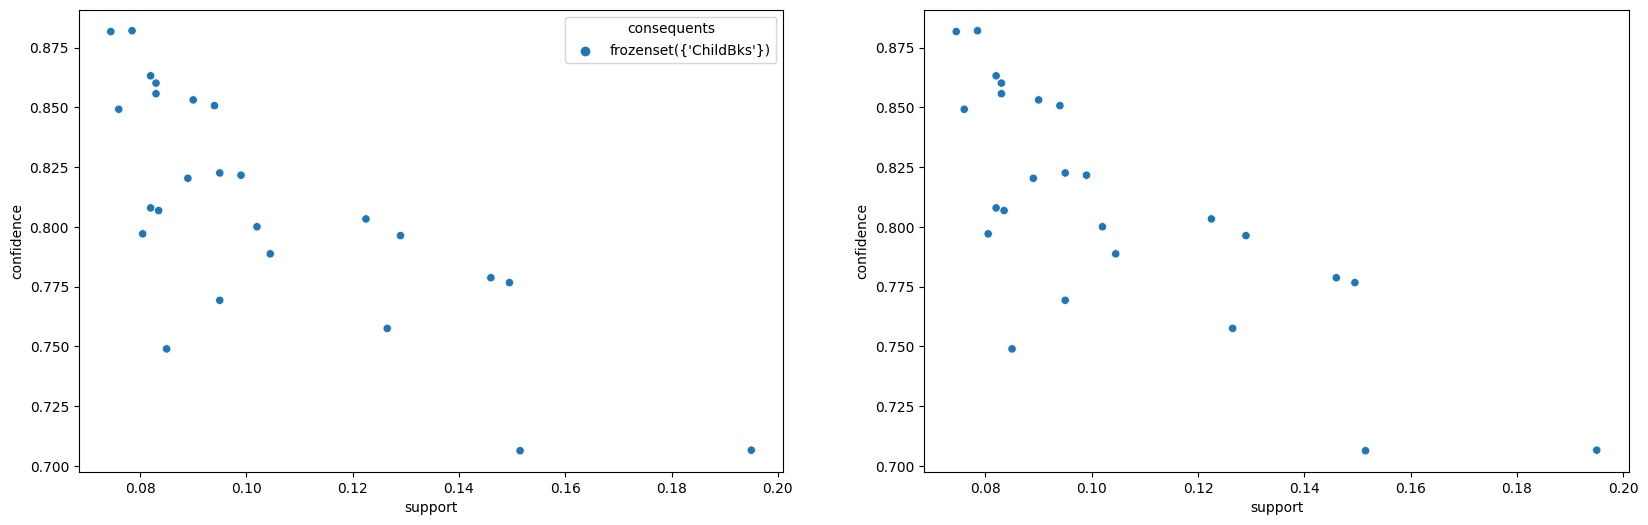

In [299]:
# visualization of obtained rule

import seaborn as sns
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.scatterplot(data=rules_cb, x="support", y="confidence", hue="consequents")

# visualization of obtained rule - Withoud Legend
plt.subplot(1,2,2)
sns.scatterplot(data=rules_cb, x="support", y="confidence", hue="consequents", legend=None)

<Axes: title={'center': 'LIFT'}, xlabel='lift', ylabel='Count'>

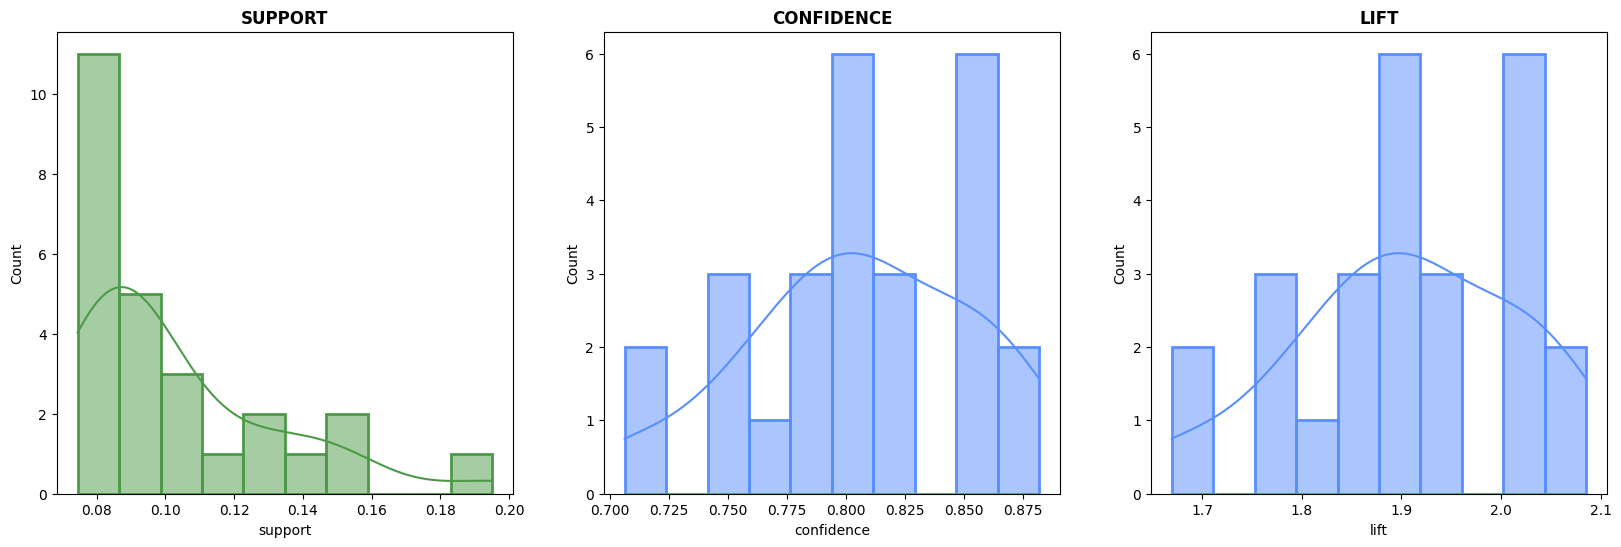

In [300]:
# Visualization of obtained rule using Seaborn
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.title("SUPPORT",fontsize='large',fontweight='bold')
sns.histplot(rules_cb, x='support', color='#4c9a47', edgecolor='#4c9a47', linewidth=2, bins=10, kde=True)

plt.subplot(1,3,2)
plt.title("CONFIDENCE",fontsize='large',fontweight='bold')
sns.histplot(rules_cb, x='confidence', color='#598eff', edgecolor='#598eff', linewidth=2, bins=10, kde=True)

plt.subplot(1,3,3)
plt.title("LIFT",fontsize='large',fontweight='bold')
sns.histplot(rules_cb, x='lift', color='#598eff', edgecolor='#598eff', linewidth=2, bins=10, kde=True)

In [301]:
# If we are interested in getting rules with support 10%, lift > 1.8 and confidence > 0.75 and 'consequents' as ChildBks -

from mlxtend.frequent_patterns import association_rules

rules = association_rules(book_ar, metric="lift", min_threshold=1.8) # book_ar contains the data with support 10%
rules_cond3 = rules[(rules['lift'] > 1.8) & (rules['confidence'] > 0.75) & (rules['consequents'] == {'ChildBks'})]
rules_cond3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
9,"(YouthBks, CookBks)",(ChildBks),0.1620,0.423,0.1290,0.796296,1.882497,0.060474,2.832545,0.559416
15,"(DoItYBks, CookBks)",(ChildBks),0.1875,0.423,0.1460,0.778667,1.840820,0.066687,2.606928,0.562171
21,"(RefBks, CookBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083,0.558594
30,"(GeogBks, CookBks)",(ChildBks),0.1925,0.423,0.1495,0.776623,1.835989,0.068072,2.583081,0.563882
34,"(DoItYBks, GeogBks)",(ChildBks),0.1325,0.423,0.1045,0.788679,1.864490,0.048452,2.730446,0.534479
40,"(ArtBks, GeogBks)",(ChildBks),0.1275,0.423,0.1020,0.800000,1.891253,0.048067,2.885000,0.540115


<Axes: xlabel='support', ylabel='confidence'>

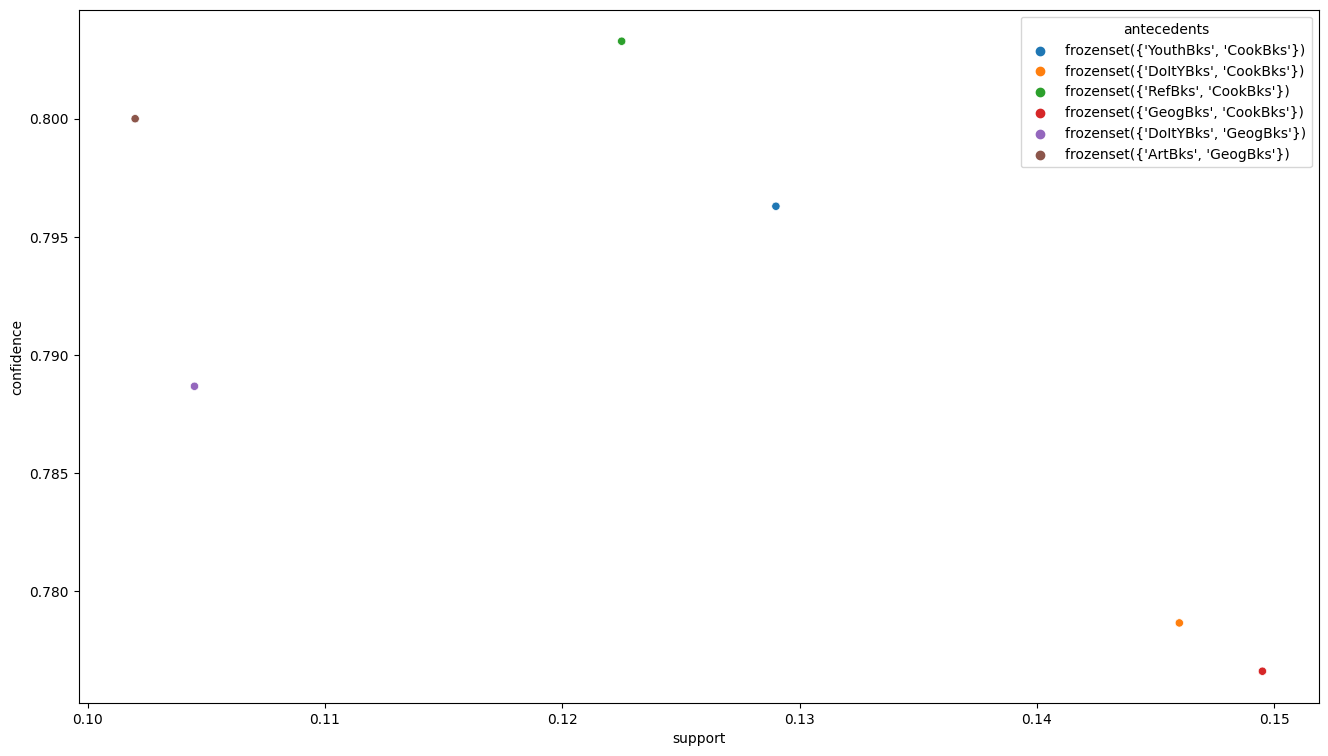

In [302]:
# visualization of obtained rule
plt.figure(figsize=(16,9))
import seaborn as sns
sns.scatterplot(data=rules_cond3, x="support", y="confidence", hue="antecedents")

<Axes: title={'center': 'LIFT'}, xlabel='lift', ylabel='Count'>

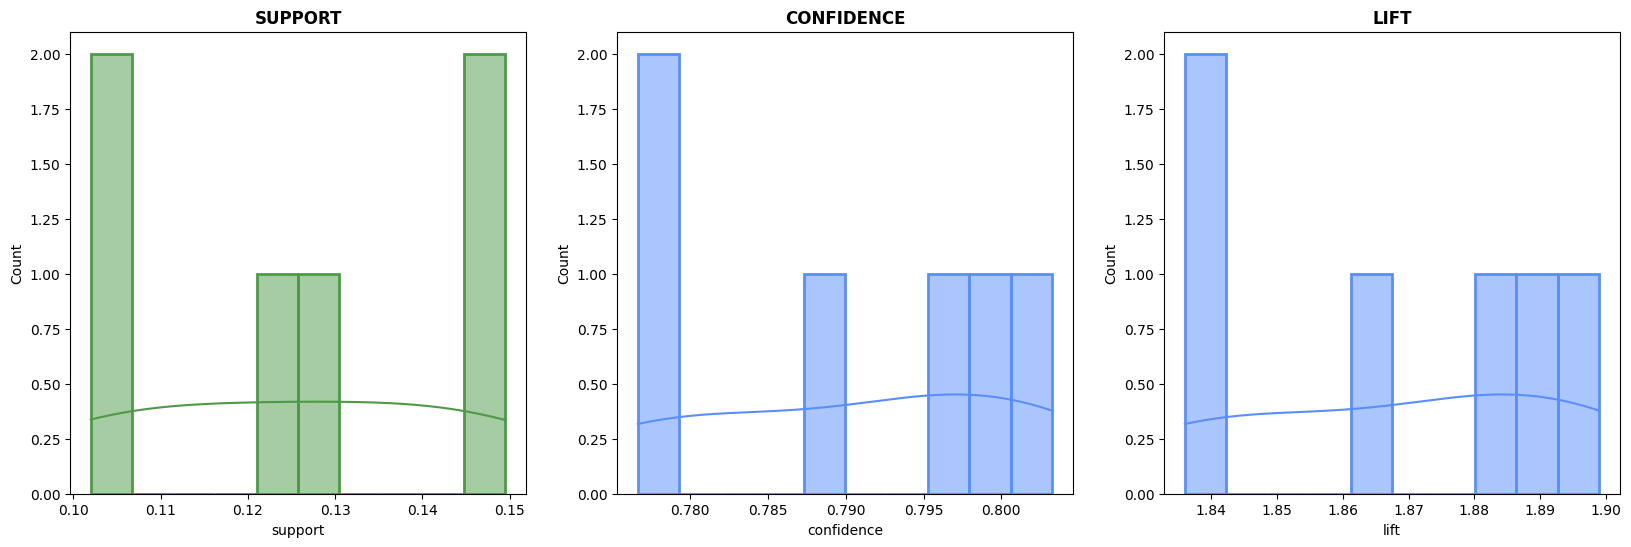

In [303]:
# Visualization of obtained rule using Seaborn
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.title("SUPPORT",fontsize='large',fontweight='bold')
sns.histplot(rules_cond3, x='support', color='#4c9a47', edgecolor='#4c9a47', linewidth=2, bins=10, kde=True)

plt.subplot(1,3,2)
plt.title("CONFIDENCE",fontsize='large',fontweight='bold')
sns.histplot(rules_cond3, x='confidence', color='#598eff', edgecolor='#598eff', linewidth=2, bins=10, kde=True)

plt.subplot(1,3,3)
plt.title("LIFT",fontsize='large',fontweight='bold')
sns.histplot(rules_cond3, x='lift', color='#598eff', edgecolor='#598eff', linewidth=2, bins=10, kde=True)

Lift Ratio > 1.8 are a good influential rule in selecting the associated transactions

### **2. Association rules with 5% Support i.e., 0.05 and 80% confidence i.e., 0.80:** ###


In [304]:
# Data preprocessing not required as it is already in transaction format
book_data2 = apriori(book_data, min_support=0.05, use_colnames=True)
book_data2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(YouthBks, DoItYBks, GeogBks, CookBks)"
96,0.0560,"(ArtBks, YouthBks, GeogBks, CookBks)"
97,0.0650,"(ArtBks, GeogBks, DoItYBks, CookBks)"
98,0.0510,"(YouthBks, GeogBks, ChildBks, DoItYBks, CookBks)"


In [305]:
final_rule = association_rules(book_data2, metric="lift", min_threshold=0.8)
final_rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
...,...,...,...,...,...,...,...,...,...,...
657,(ArtBks),"(DoItYBks, GeogBks, ChildBks, CookBks)",0.2410,0.0890,0.0535,0.221992,2.494289,0.032051,1.170939,0.789307
658,(GeogBks),"(ArtBks, DoItYBks, ChildBks, CookBks)",0.2760,0.0820,0.0535,0.193841,2.363910,0.030868,1.138733,0.796923
659,(ChildBks),"(ArtBks, GeogBks, DoItYBks, CookBks)",0.4230,0.0650,0.0535,0.126478,1.945808,0.026005,1.070379,0.842417
660,(DoItYBks),"(ArtBks, GeogBks, ChildBks, CookBks)",0.2820,0.0835,0.0535,0.189716,2.272052,0.029953,1.131085,0.779762


## **Network Plot** ##
### **Creation of Network Plot to check relations between the purchase patterns of the Books** ###

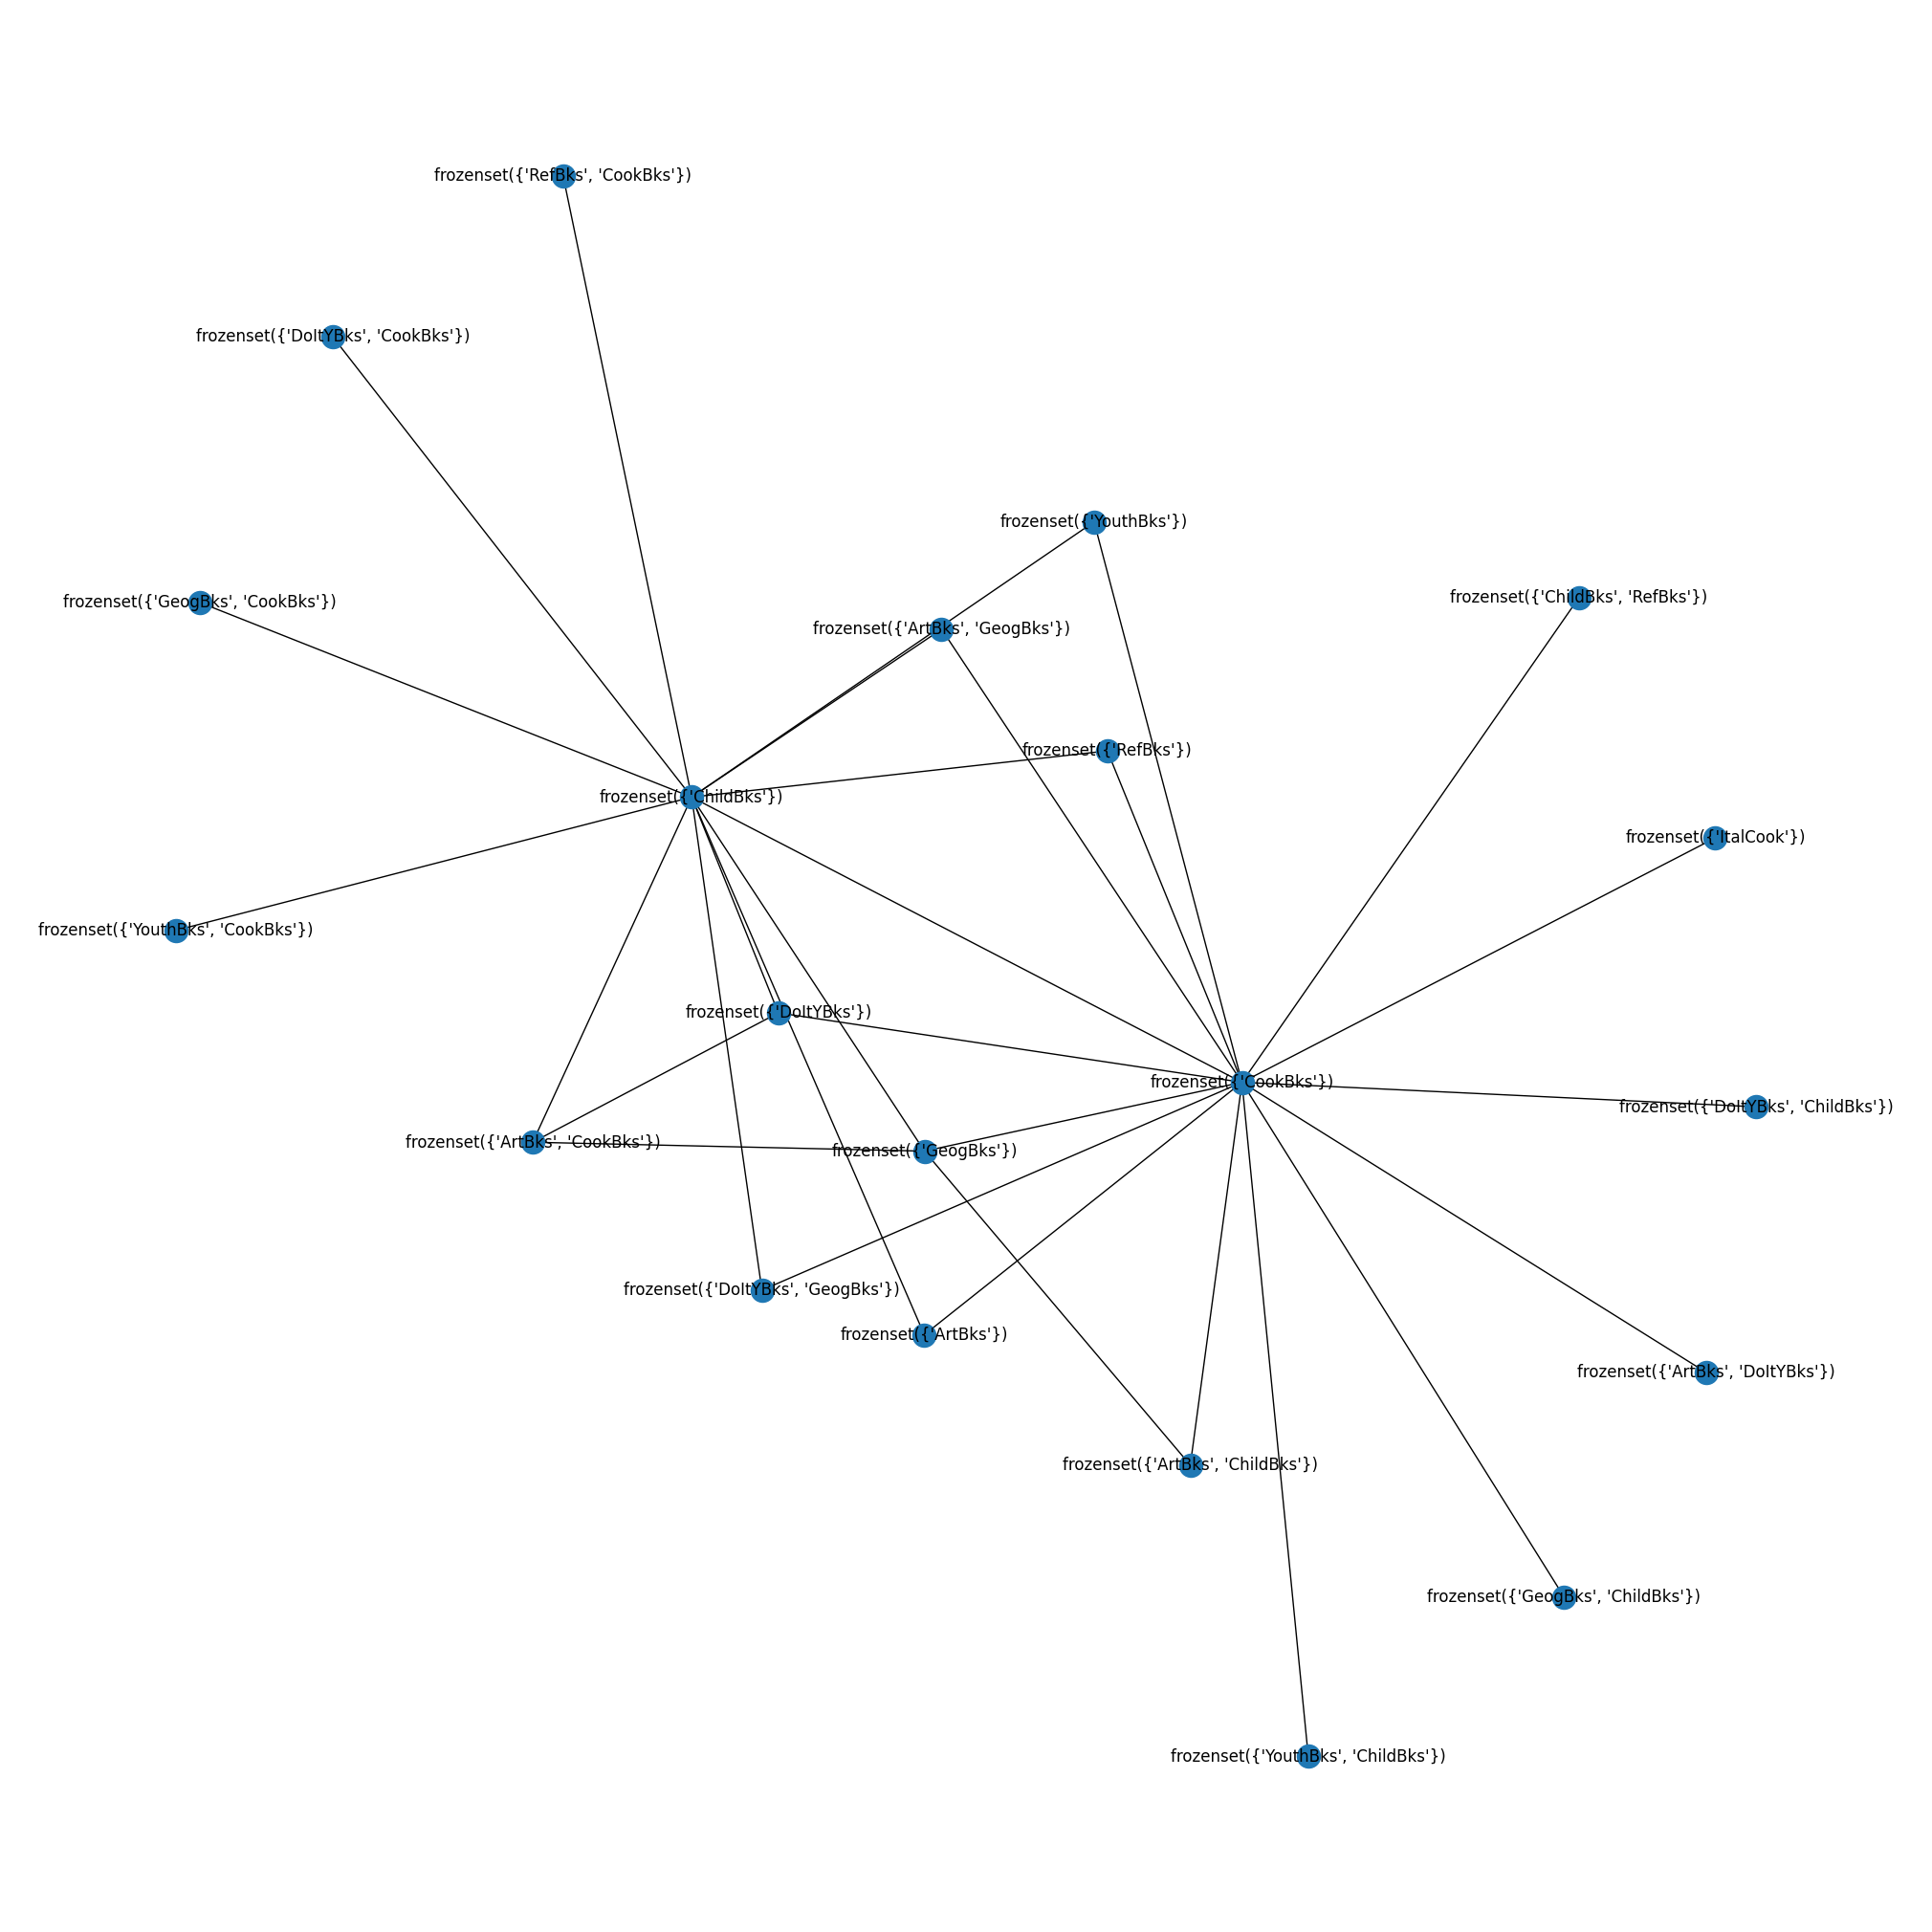

In [306]:
# Creating Network Plot using rule 'rules_conf3'

plt.figure(figsize=(20,20))

# Building a network graph
netplot = pd.DataFrame({'from':rules_conf3['antecedents'], 'to':rules_conf3['consequents']})
netplot
import networkx as nx
networkplot= nx.from_pandas_edgelist(netplot,'from','to')

# Plotting the graph
nx.draw(networkplot,with_labels=True)
plt.show()

### **INFERENCE** ####
Based on the network graph we can see that **'CookBks'**', **''ChildBks'**' and **''DoItYBks'**' seem to be the **'most popular products**' purchased. As many items are interlinked with these products, the chances of those items being purchased are also more.

## **ASSOCIATION RULES** ##
# **PART 2** #

File : my_movies.csv

In [307]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder


palette_color = sns.color_palette('rainbow')
import warnings
warnings.filterwarnings('ignore')

### **Importing data from file my_movies.csv** ###

In [308]:
# Reading the data from the file 'my_movies.csv'
movie_orig_data = pd.read_csv("my_movies.csv")
movie_orig_data

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


### **EDA (Exploratory Data Analysis)**

In [309]:
movie_orig_data.shape

(10, 15)

In [310]:
movie_orig_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


#### *Checking for missing values* ####

In [311]:
# check for missing values
movie_orig_data.isna().sum() # The result shows that there are missing values within the first five columns

# The first 5 columns, we intend on removing i.e. not considering

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

#### *Checking for Null Values* ####

In [312]:
# Checking to see if there are any null values
# We can get this information using movie_orig_data.info() option as well
movie_orig_data.isnull().sum() # The result shows that there are null values within the first 5 columns

# The first 5 columns, we intend on removing i.e. not considering

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

#### *Checking the data structure* ####

In [313]:
# Data Structure
print(type(movie_orig_data))
movie_orig_data.shape

<class 'pandas.core.frame.DataFrame'>


(10, 15)

In [314]:
# Checking data types
movie_orig_data.dtypes # check data types of all variables

V1               object
V2               object
V3               object
V4               object
V5               object
Sixth Sense       int64
Gladiator         int64
LOTR1             int64
Harry Potter1     int64
Patriot           int64
LOTR2             int64
Harry Potter2     int64
LOTR              int64
Braveheart        int64
Green Mile        int64
dtype: object

In [315]:
# Ignoring the first 5 columns and only considering the later relevant columns
movie_data = movie_orig_data.iloc[:,5:]
movie_data

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [316]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


Data preprocessing not required as it is already in transaction format

#### *Descriptive Analysis* ####

In [317]:
movie_data.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [318]:
# check for missing values once again
movie_data.isna().sum() # The result shows that there are no missing values

Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [319]:
# Checking to see if there are any null values
# We can get this information using book_data.info() option as well
movie_data.isnull().sum() # The result shows that there are no null values

Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

The missing and null values have been taken care of now. Moreover, all data values are integers and so nothing major needs to be done now.

In [320]:
# Most frequently occuring items
count = movie_data.loc[:,:].sum().sort_values(ascending=False)
count

# 'Gladiator', 'Sixth Sense' and 'Patriot' are the most frequently occuring or popular

Gladiator        7
Sixth Sense      6
Patriot          6
LOTR1            2
Harry Potter1    2
LOTR2            2
Green Mile       2
Harry Potter2    1
LOTR             1
Braveheart       1
dtype: int64

In [321]:
# The Columns are:
print(f"The number of columns are {movie_data.columns.size} and the columns are -\n\n{movie_data.columns}\n")

# Column-Wise Breakup
for column in movie_data.columns:
    print(movie_data[column].value_counts(),"\n")

The number of columns are 10 and the columns are -

Index(['Sixth Sense', 'Gladiator', 'LOTR1', 'Harry Potter1', 'Patriot',
       'LOTR2', 'Harry Potter2', 'LOTR', 'Braveheart', 'Green Mile'],
      dtype='object')

Sixth Sense
1    6
0    4
Name: count, dtype: int64 

Gladiator
1    7
0    3
Name: count, dtype: int64 

LOTR1
0    8
1    2
Name: count, dtype: int64 

Harry Potter1
0    8
1    2
Name: count, dtype: int64 

Patriot
1    6
0    4
Name: count, dtype: int64 

LOTR2
0    8
1    2
Name: count, dtype: int64 

Harry Potter2
0    9
1    1
Name: count, dtype: int64 

LOTR
0    9
1    1
Name: count, dtype: int64 

Braveheart
0    9
1    1
Name: count, dtype: int64 

Green Mile
0    8
1    2
Name: count, dtype: int64 



In [322]:
print(f'The unique books sold are {movie_data.columns}')
print(f"The number of unique books sold are {len(movie_data.columns)}")

The unique books sold are Index(['Sixth Sense', 'Gladiator', 'LOTR1', 'Harry Potter1', 'Patriot',
       'LOTR2', 'Harry Potter2', 'LOTR', 'Braveheart', 'Green Mile'],
      dtype='object')
The number of unique books sold are 10


### **Data preprocessing not required as it is already in transaction format** ### 

In [323]:
# Getting the count for columns and sorting them in descending order
moviedf_desc = movie_data.sum().sort_values(ascending=False)
columns = moviedf_desc.keys().tolist()
values = moviedf_desc.values.tolist()
col_cnt_df = pd.DataFrame(columns=['Category', 'Count'])
col_cnt_df['Category'] = columns
col_cnt_df['Count'] = values
col_cnt_df

,Category,Count
0,Gladiator,7
1,Sixth Sense,6
2,Patriot,6
3,LOTR1,2
4,Harry Potter1,2
5,LOTR2,2
6,Green Mile,2
7,Harry Potter2,1
8,LOTR,1
9,Braveheart,1


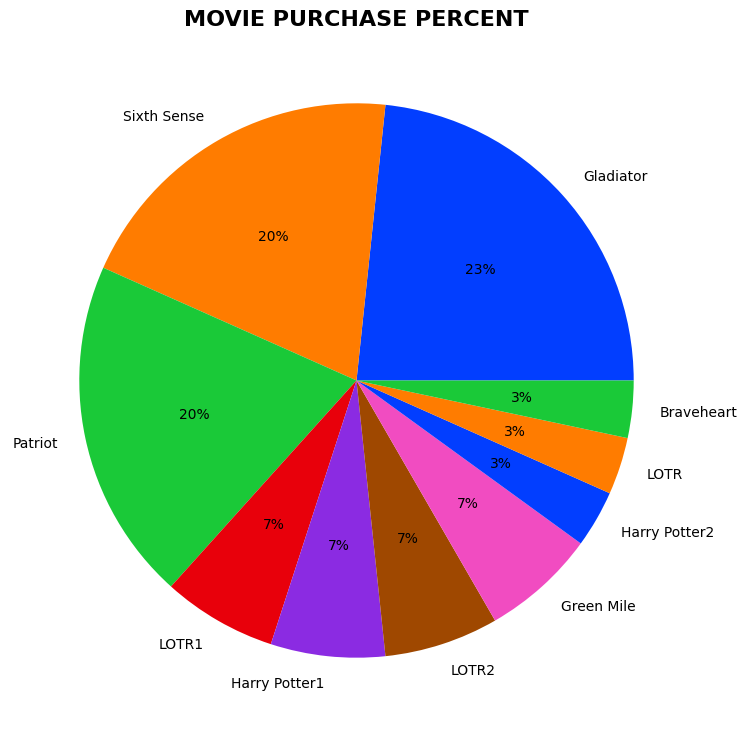

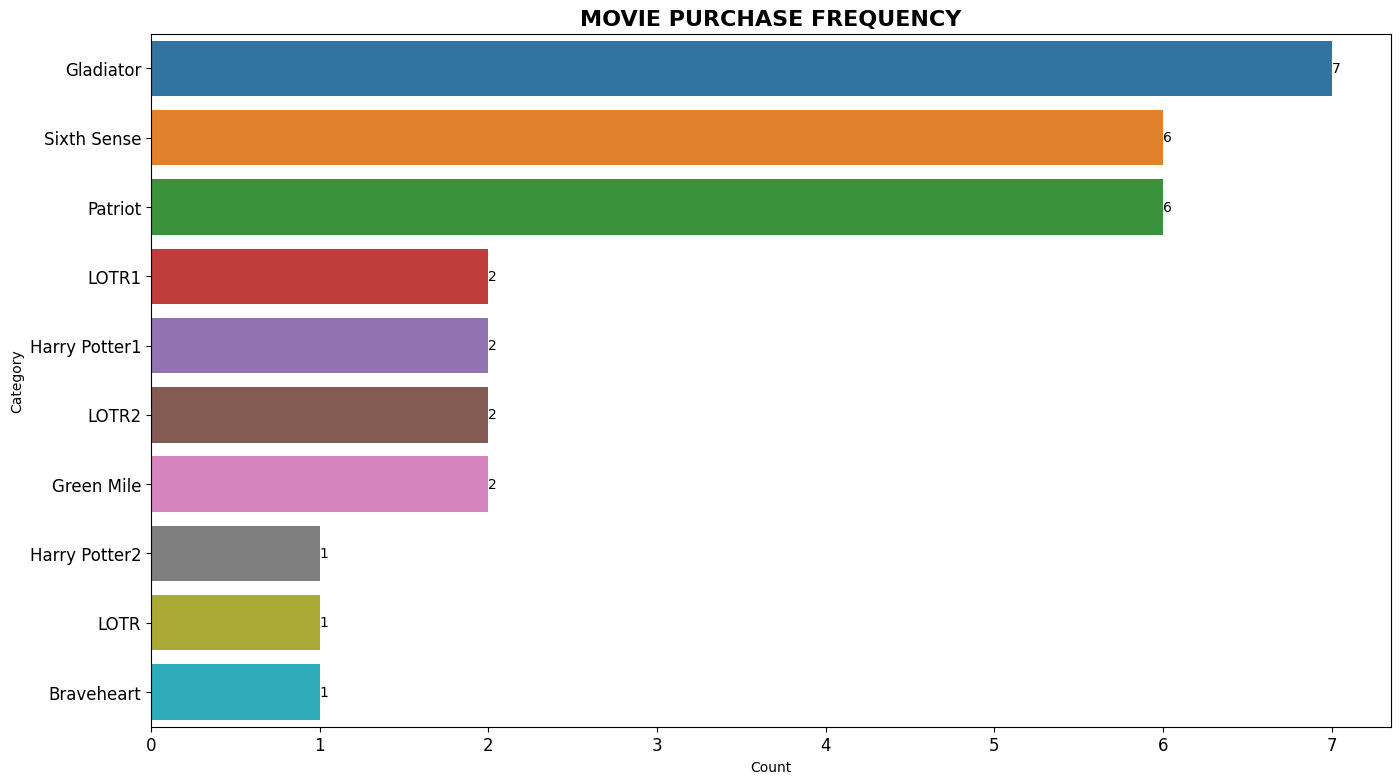

In [324]:
# Segregation of the book_data break-up
import matplotlib.pyplot as plt
import seaborn as sns


palette_color = sns.color_palette('bright')[0:7]
plt.figure(figsize = (20,9))
plt.pie(col_cnt_df['Count'], labels=col_cnt_df['Category'], colors=palette_color, autopct='%.0f%%')
plt.title('MOVIE PURCHASE PERCENT',  fontsize = 16, fontweight = 'bold')
plt.show()

plt.figure(figsize = (16,9))
bar_plot = sns.barplot(x = 'Count', y = 'Category', data= col_cnt_df)
plt.yticks(rotation = 0, fontsize = 12)
plt.xticks(rotation = 0, fontsize = 12)
plt.title('MOVIE PURCHASE FREQUENCY', fontsize = 16, fontweight = 'bold')
for i in bar_plot.containers:
    bar_plot.bar_label(i,)
plt.show()

## **Support and Length** ##

#### **Using Single product categories** ####

In [325]:
# Product Frequency / Total Sales
first_iter = pd.DataFrame(movie_data.sum() / movie_data.shape[0], columns = ["Support"]).sort_values("Support", ascending = False)
length_1 = pd.DataFrame(movie_data.sum() / movie_data.shape[0], columns = ["Support"]).sort_values("Support", ascending = False)
length_1.reset_index(inplace=True)
length_1 = length_1.rename(columns = {'index':'Book_Category'})
length_1

,Book_Category,Support
0,Gladiator,0.7
1,Sixth Sense,0.6
2,Patriot,0.6
3,LOTR1,0.2
4,Harry Potter1,0.2
5,LOTR2,0.2
6,Green Mile,0.2
7,Harry Potter2,0.1
8,LOTR,0.1
9,Braveheart,0.1


In [326]:
# We can choose from the dataset 'length_1' to eliminate based on the support value
treshold = [0.2, 0.6, 0.7]

for t in treshold:
    print(f"DataSet with treshold > {t}:\n{length_1[length_1.Support >= t]}\n")

DataSet with treshold > 0.2:
   Book_Category  Support
0      Gladiator      0.7
1    Sixth Sense      0.6
2        Patriot      0.6
3          LOTR1      0.2
4  Harry Potter1      0.2
5          LOTR2      0.2
6     Green Mile      0.2

DataSet with treshold > 0.6:
  Book_Category  Support
0     Gladiator      0.7
1   Sixth Sense      0.6
2       Patriot      0.6

DataSet with treshold > 0.7:
  Book_Category  Support
0     Gladiator      0.7



#### **Using Combination of 2 product categories** ####

In [327]:
# Using itertools package to create combinations of 2 product categories
# importing itertools package

import itertools

temp_list = list(itertools.combinations(first_iter.index, 2))
temp_list = [list(i) for i in temp_list]
# Sample of combinations
temp_list[:10]


# Finding support values
value = []
for i in (temp_list):
    temp = movie_data.T.loc[i].sum() # Transposing and getting the sum count
    temp = len(temp[temp == movie_data.T.loc[i].shape[0]]) / movie_data.shape[0]
    value.append(temp)

# Create a data frame            
second_iter = pd.DataFrame(value, columns = ["Support"])
second_iter["index"] = [tuple(i) for i in temp_list]
second_iter['length'] = second_iter['index'].apply(lambda x:len(x))
second_iter = second_iter.set_index("index").sort_values("Support", ascending = False)

# Elimination by Support Value
second_iter = second_iter[second_iter.Support > 0.1]
second_iter


,Support,length
index,,
"(Gladiator, Patriot)",0.6,2
"(Gladiator, Sixth Sense)",0.5,2
"(Sixth Sense, Patriot)",0.4,2
"(Sixth Sense, Green Mile)",0.2,2
"(LOTR1, LOTR2)",0.2,2


## **Apriori Algorithm** ##

### **Support and Length** ###

### ***1. Association Rule with 10% Support value i.e., 0.1*** ###

In [328]:
# Identifying the frequent items using Association rule with 10% Support
movie_ar_10=apriori(movie_data,min_support=0.1,use_colnames=True)
movie_ar_10['Length'] = movie_ar_10['itemsets'].apply(lambda x: len(x))
movie_ar_10

,support,itemsets,Length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.1,(Harry Potter2),1
7,0.1,(LOTR),1
8,0.1,(Braveheart),1
9,0.2,(Green Mile),1


In [329]:
# Length = 1
movie_ar_10[movie_ar_10['Length']==1].sort_values(by='support',ascending=False, ignore_index=True).head(5)

,support,itemsets,Length
0,0.7,(Gladiator),1
1,0.6,(Sixth Sense),1
2,0.6,(Patriot),1
3,0.2,(LOTR1),1
4,0.2,(Harry Potter1),1


In [330]:
# Length = 2
movie_ar_10[movie_ar_10['Length']==2].sort_values(by='support',ascending=False, ignore_index=True).head(5)

,support,itemsets,Length
0,0.6,"(Patriot, Gladiator)",2
1,0.5,"(Sixth Sense, Gladiator)",2
2,0.4,"(Sixth Sense, Patriot)",2
3,0.2,"(LOTR2, LOTR1)",2
4,0.2,"(Sixth Sense, Green Mile)",2


In [331]:
# Length = 3
movie_ar_10[movie_ar_10['Length']==3].sort_values(by='support',ascending=False, ignore_index=True).head(5)

,support,itemsets,Length
0,0.4,"(Sixth Sense, Patriot, Gladiator)",3
1,0.1,"(Sixth Sense, LOTR, Gladiator)",3
2,0.1,"(Sixth Sense, Green Mile, Gladiator)",3
3,0.1,"(Sixth Sense, Harry Potter1, LOTR1)",3
4,0.1,"(Sixth Sense, LOTR2, LOTR1)",3


In [332]:
# Length = 4
movie_ar_10[movie_ar_10['Length']==4].sort_values(by='support',ascending=False, ignore_index=True).head(5)

,support,itemsets,Length
0,0.1,"(Sixth Sense, Green Mile, LOTR, Gladiator)",4
1,0.1,"(Sixth Sense, Harry Potter1, LOTR2, LOTR1)",4
2,0.1,"(Harry Potter1, Sixth Sense, Green Mile, LOTR1)",4
3,0.1,"(Sixth Sense, Green Mile, LOTR2, LOTR1)",4
4,0.1,"(Sixth Sense, Green Mile, LOTR2, Harry Potter1)",4


In [333]:
# Length = 5
movie_ar_10[movie_ar_10['Length']==5].sort_values(by='support',ascending=False, ignore_index=True).head(5)

,support,itemsets,Length
0,0.1,"(Sixth Sense, LOTR2, LOTR1, Green Mile, Harry ...",5


##### **INFERENCE:** #####
**Length = 1: Individual book categories**
Most frequent **Individual** books bought are : **Gladiator** followed by **Sixth Sense**, followed by **Patriot**

**Length = 2: Combination of 2 book categories**
The most frequent bought books in **Double combinations** are - **(Patriot, Gladiator)** followed by **(Gladiator, Sixth Sense)** and then **(Patriot, Sixth Sense)**

**Length = 3: Combination of 3 book categories**
The most frequent bought books in **Triple combinations** are - **(Patriot, Gladiator, Sixth Sense)** followed by **(Gladiator, LOTR, Sixth Sense)** and then **(Green Mile, Gladiator, Sixth Sense)**

**Length = 4: Combination of 4 book categories**
The most frequent bought books in **Four Book combinations** are - Almost all the combinations have the same support with **(Green Mile, Gladiator, LOTR, Sixth Sense)** leading the same.

**Length = 5: Combination of 5 book categories**
The only frequent bought books in **Five Book combinations** is - **(Sixth Sense, Green Mile, LOTR1, LOTR2,Harry Potter1)**

In [334]:
movie_ar_10 = movie_ar_10.sort_values("support", ascending = False)
movie_ar_10.head(10)

,support,itemsets,Length
1,0.7,(Gladiator),1
0,0.6,(Sixth Sense),1
4,0.6,(Patriot),1
17,0.6,"(Patriot, Gladiator)",2
10,0.5,"(Sixth Sense, Gladiator)",2
30,0.4,"(Sixth Sense, Patriot, Gladiator)",3
13,0.4,"(Sixth Sense, Patriot)",2
9,0.2,(Green Mile),1
22,0.2,"(LOTR2, LOTR1)",2
16,0.2,"(Sixth Sense, Green Mile)",2


##### **INFERENCE:** #####
- The *1st* highest 'support' value is for *Gladiator* with 0.70 support. Which implies that *70 percent* of 100 purchases are *Gladiator*
- The *2nd* highest 'support' value is for the *(Patriot, Gladiator)* combination with 0.60 support. Which implies that *60 percent* of 100 purchases is the combination *(Patriot, Gladiator)*
- The *3rd* highest 'support' value is for *Sixth Sense* with 0.60 support. Which implies that *60 percent* of 100 purchases are *Sixth Sense*
- The *4th* highest 'support' value is for *Patriot* with 0.60 support. Which implies that *60 percent* of 100 purchases are *Patriot*
- The *5th* highest 'support' value is for the *(Gladiator, Sixth Sense)* combination with 0.50 support. Which implies that *50 percent* of 100 purchases is the combination *(Gladiator, Sixth Sense)*

### ***Association Rule with 10% Support value i.e., 0.1 and 30% confidence*** ###
Checking for rules derived from the frequent itemsets only if the level of confidence is above the 30 percent threshold (min_threshold=0.3):

***Confidence min_threshold > 0.3***

In [335]:
# with 30% Confidence
rules_mov_conf1 = association_rules(movie_ar_10,metric='confidence', min_threshold=0.3)
rules_mov_conf1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
1,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
2,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
3,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
4,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000
...,...,...,...,...,...,...,...,...,...,...
212,"(Green Mile, Harry Potter1)","(Sixth Sense, LOTR2, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
213,(LOTR2),"(Harry Potter1, Sixth Sense, Green Mile, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
214,(LOTR1),"(Sixth Sense, Green Mile, LOTR2, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
215,(Green Mile),"(Sixth Sense, Harry Potter1, LOTR2, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000


In [336]:
rules_mov_conf1.shape

(217, 10)

In [337]:
rules_mov_conf1.sort_values(by='confidence',ascending=False).head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf,0.750000
146,"(Sixth Sense, Harry Potter1)","(LOTR2, LOTR1)",0.1,0.2,0.1,1.0,5.000000,0.08,inf,0.888889
123,"(Sixth Sense, LOTR)","(Green Mile, Gladiator)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000
124,"(Green Mile, LOTR)","(Sixth Sense, Gladiator)",0.1,0.5,0.1,1.0,2.000000,0.05,inf,0.555556
125,"(Green Mile, Gladiator)","(Sixth Sense, LOTR)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000


In [338]:
# If the Lift Ratio > 1 it is a good influential rule in selecting the associated transactions
# Filtering out the records that have Lift Ratio > 1

final_rules_mov_conf1 = rules_mov_conf1[rules_mov_conf1.lift>1]
final_rules_mov_conf1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
1,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
2,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
3,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
4,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000
...,...,...,...,...,...,...,...,...,...,...
212,"(Green Mile, Harry Potter1)","(Sixth Sense, LOTR2, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
213,(LOTR2),"(Harry Potter1, Sixth Sense, Green Mile, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
214,(LOTR1),"(Sixth Sense, Green Mile, LOTR2, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
215,(Green Mile),"(Sixth Sense, Harry Potter1, LOTR2, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000


In [339]:
final_rules_mov_conf1.shape # 7 records are ignored as their lift percentage is lower than 1

(210, 10)

##### **INFERENCE:** #####
- The highest confidence is for purchase of Gladiator if Patriot is purchased. The support value is 60%.
- This is followed by the purchase of (LOTR1, Sixth Sense) if (LOTR2, Harry Potter1) where purchased. Also, (Green Mile, Gladiator)	if (LOTR, Sixth Sense) where purchased and (Green Mile, Gladiator, Sixth Sense) if (LOTR) where purchased. They all possess the same confidence and high lift values and conviction indicating that the consequent is highly depending on the antecedent.
- The lift values fo the top 10 records are greater than 1 indicates high correlation between the items i.e., the 'antecedents' and 'consequents'

Text(0.5, 1.0, 'Rules with 10% Support and 30% Confidence')

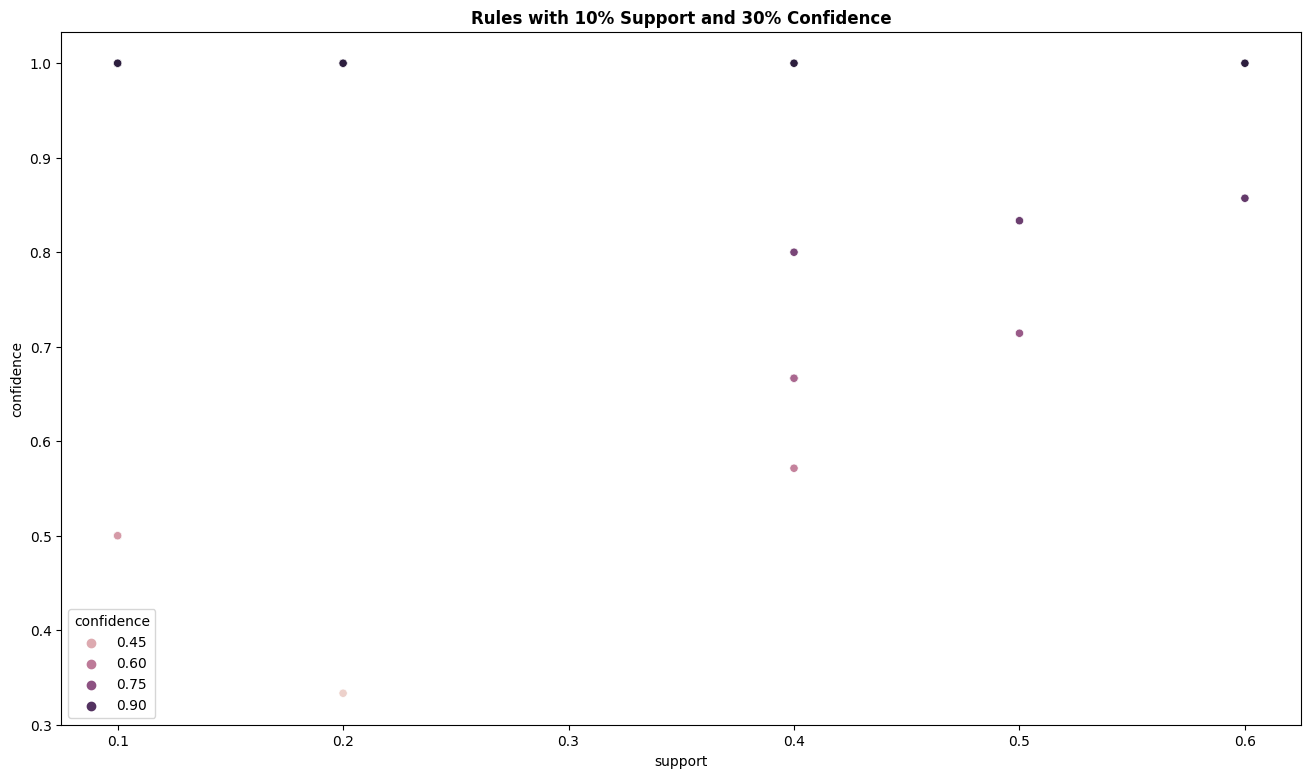

In [340]:
# Visualization of obtained rule
plt.figure(figsize=(16,9))
import seaborn as sns
sns.scatterplot(data=final_rules_mov_conf1, x="support", y="confidence", hue="confidence")
plt.title("Rules with 10% Support and 30% Confidence", fontsize = 'large', fontweight = 'bold')

<Axes: title={'center': 'LIFT'}, xlabel='lift', ylabel='Count'>

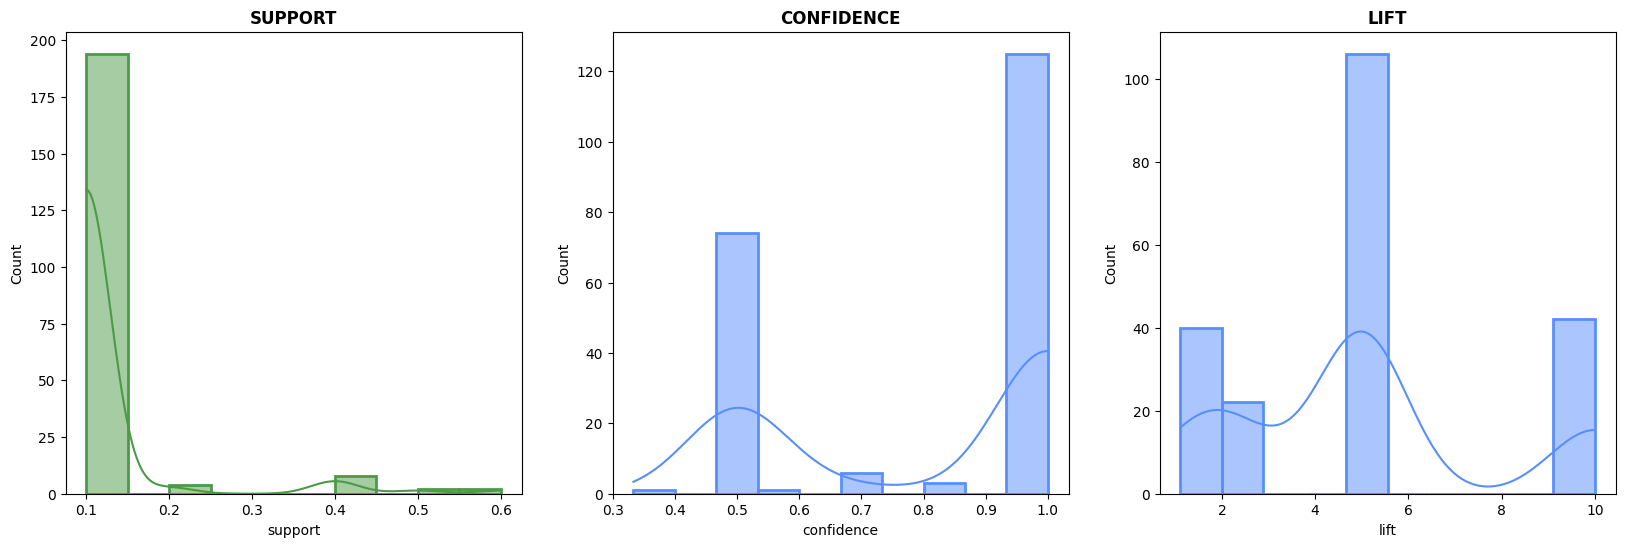

In [341]:
# Visualization of obtained rule using Seaborn
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.title("SUPPORT",fontsize='large',fontweight='bold')
sns.histplot(final_rules_mov_conf1, x='support', color='#4c9a47', edgecolor='#4c9a47', linewidth=2, bins=10, kde=True)

plt.subplot(1,3,2)
plt.title("CONFIDENCE",fontsize='large',fontweight='bold')
sns.histplot(final_rules_mov_conf1, x='confidence', color='#598eff', edgecolor='#598eff', linewidth=2, bins=10, kde=True)

plt.subplot(1,3,3)
plt.title("LIFT",fontsize='large',fontweight='bold')
sns.histplot(final_rules_mov_conf1, x='lift', color='#598eff', edgecolor='#598eff', linewidth=2, bins=10, kde=True)


### ***2. Association Rule with 12% Support value i.e., 0.12 and 80% confidence*** ###
Checking for rules derived from the frequent itemsets only if the level of confidence is above the 30 percent threshold (min_threshold=0.3):

In [342]:
# Identifying the frequent items using Association rule with 10% Support
movie_ar_12=apriori(movie_data,min_support=0.12,use_colnames=True)
movie_ar_12['Length'] = movie_ar_12['itemsets'].apply(lambda x: len(x))
movie_ar_12

,support,itemsets,Length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.2,(Green Mile),1
7,0.5,"(Sixth Sense, Gladiator)",2
8,0.4,"(Sixth Sense, Patriot)",2
9,0.2,"(Sixth Sense, Green Mile)",2


In [343]:
# with 80% Confidence
rules_mov_conf4 = association_rules(movie_ar_12,metric='confidence', min_threshold=0.8)
rules_mov_conf4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.40
1,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.50
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.75
3,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.00
4,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.00
5,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.00
6,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.50
7,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.50


Text(0.5, 1.0, 'Rules with 10% Support and 30% Confidence')

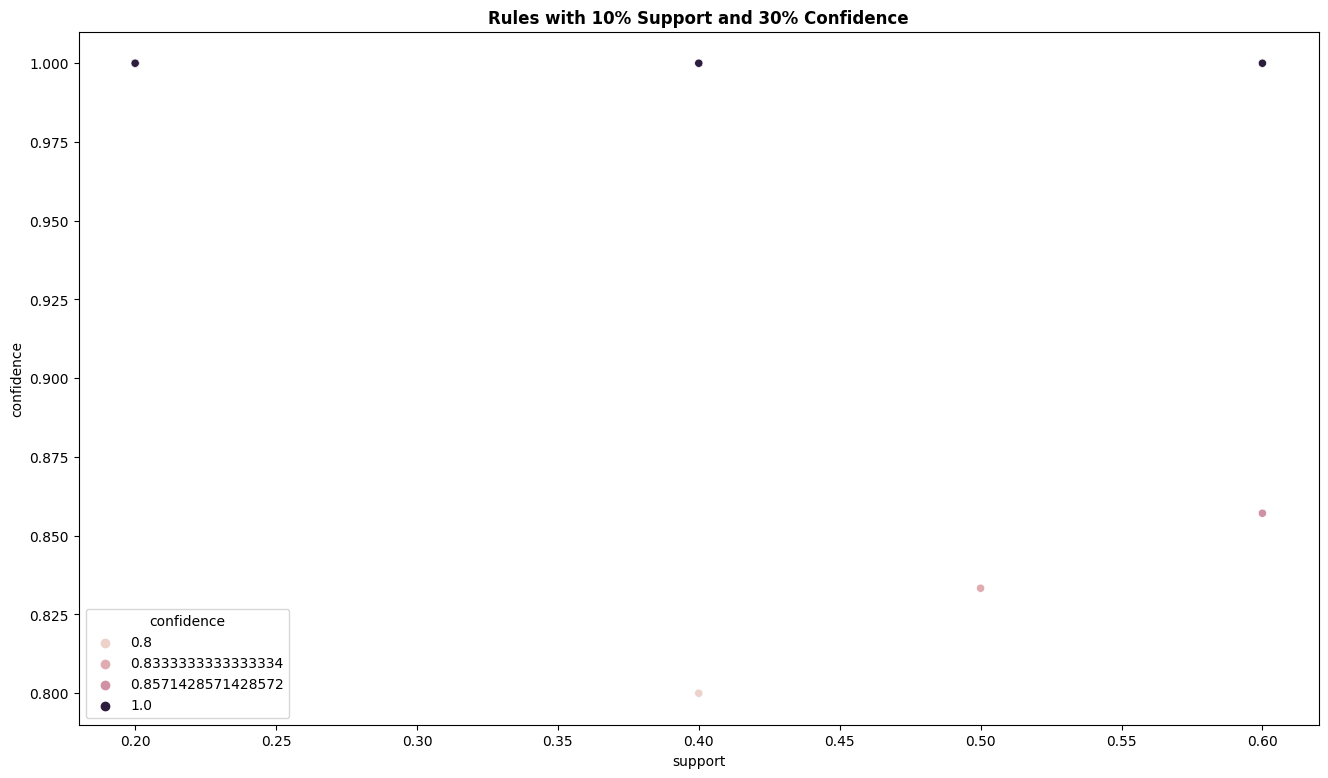

In [344]:
# Visualization of obtained rule
plt.figure(figsize=(16,9))
import seaborn as sns
sns.scatterplot(data=rules_mov_conf4, x="support", y="confidence", hue="confidence")
plt.title("Rules with 10% Support and 30% Confidence", fontsize = 'large', fontweight = 'bold')

<Axes: title={'center': 'LIFT'}, xlabel='lift', ylabel='Count'>

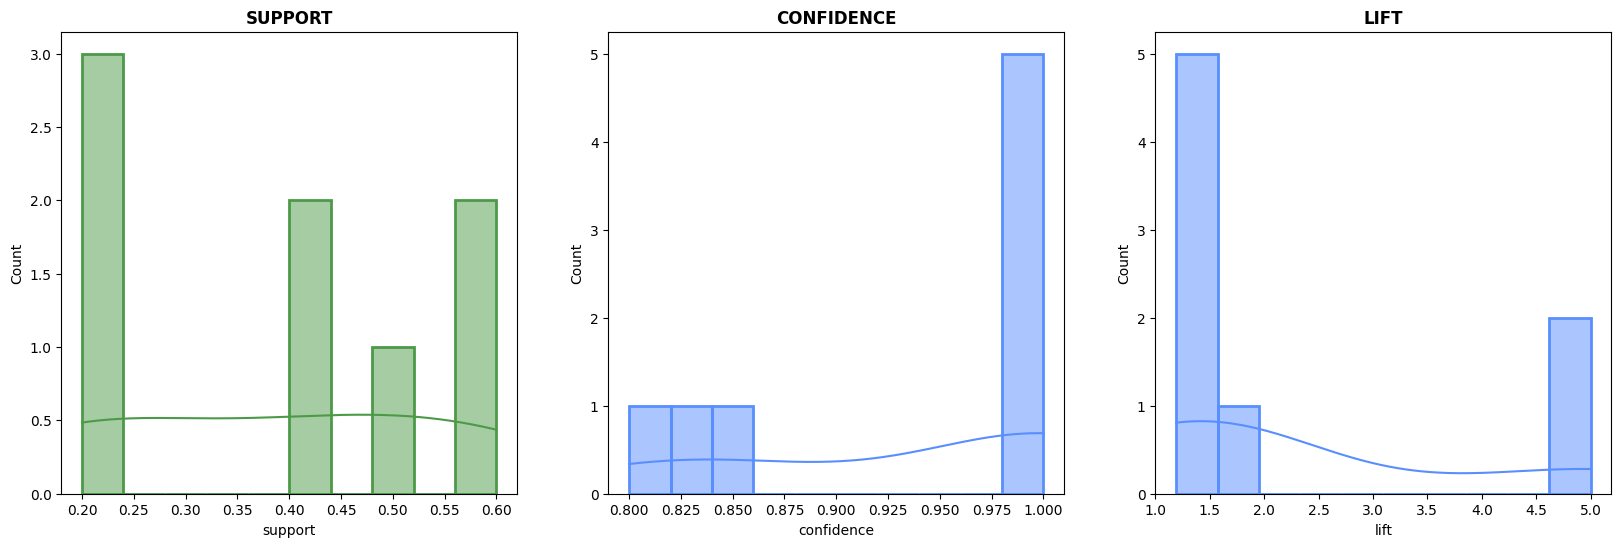

In [345]:
# Visualization of obtained rule using Seaborn
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.title("SUPPORT",fontsize='large',fontweight='bold')
sns.histplot(rules_mov_conf4, x='support', color='#4c9a47', edgecolor='#4c9a47', linewidth=2, bins=10, kde=True)

plt.subplot(1,3,2)
plt.title("CONFIDENCE",fontsize='large',fontweight='bold')
sns.histplot(rules_mov_conf4, x='confidence', color='#598eff', edgecolor='#598eff', linewidth=2, bins=10, kde=True)

plt.subplot(1,3,3)
plt.title("LIFT",fontsize='large',fontweight='bold')
sns.histplot(rules_mov_conf4, x='lift', color='#598eff', edgecolor='#598eff', linewidth=2, bins=10, kde=True)


### ***3. Association rules with 20% Support and 60% confidence*** ###

In [346]:
# With 20% Support
movie_ar_20=apriori(movie_data,min_support=0.2,use_colnames=True)
movie_ar_20['Length'] = movie_ar_20['itemsets'].apply(lambda x: len(x))
movie_ar_20

,support,itemsets,Length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.2,(Green Mile),1
7,0.5,"(Sixth Sense, Gladiator)",2
8,0.4,"(Sixth Sense, Patriot)",2
9,0.2,"(Sixth Sense, Green Mile)",2


In [347]:
movie_ar_20.sort_values("support", ascending = False)

,support,itemsets,Length
1,0.7,(Gladiator),1
0,0.6,(Sixth Sense),1
4,0.6,(Patriot),1
10,0.6,"(Patriot, Gladiator)",2
7,0.5,"(Sixth Sense, Gladiator)",2
8,0.4,"(Sixth Sense, Patriot)",2
12,0.4,"(Sixth Sense, Patriot, Gladiator)",3
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
5,0.2,(LOTR2),1


The Top 5 highest Support Scores are seen for -
- The first highest percentage is *Gladiator* with 70%
- The second highest is *Sixth Sense* with 60%
- The third highest is *Patriot* with 60%
- The forth highest is the combination *(Patriot, Gladiator)* with 60%
- The fifth highest is the combination *(Gladiator, Sixth Sense)* with 50%

***Confidence min_threshold > 0.6***

In [348]:
# with 60% Confidence
rules_mov_conf2 = association_rules(movie_ar_20,metric='confidence', min_threshold=0.6)
rules_mov_conf2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
5,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
7,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
9,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000


In [349]:
rules_mov_conf2.sort_values(by='confidence',ascending=False).head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.0,1.666667,0.08,inf,0.50
5,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf,0.75
7,(LOTR2),(LOTR1),0.2,0.2,0.2,1.0,5.000000,0.16,inf,1.00
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.0,5.000000,0.16,inf,1.00
9,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.0,1.428571,0.12,inf,0.50


##### **INFERENCE:** #####
- All the above listed 5 records have the confidence of 1 i.e. 100%.
- All have lift percentages > 1 indicating a high correlation between the items i.e., the 'antecedents' and 'consequents'.
- They all possess high conviction indicating that the consequent is highly depending on the antecedent.
- There is a high correlation between the purchases of the consequent if the antecedent is purchased i.e., purchase of *Sixth Sense* if *Green Mile* is purchased, purchase of *Gladiator* if *Patriot* is purchased, purchase of *LOTR2* if *LOTR1* is purchased, purchase of *LOTR1* if *LOTR2* is purchased, purchase of *Gladiator* if combination (Patriot, Sixth Sense) is purchased.

Text(0.5, 1.0, 'Rules with 20% Support and 60% Confidence')

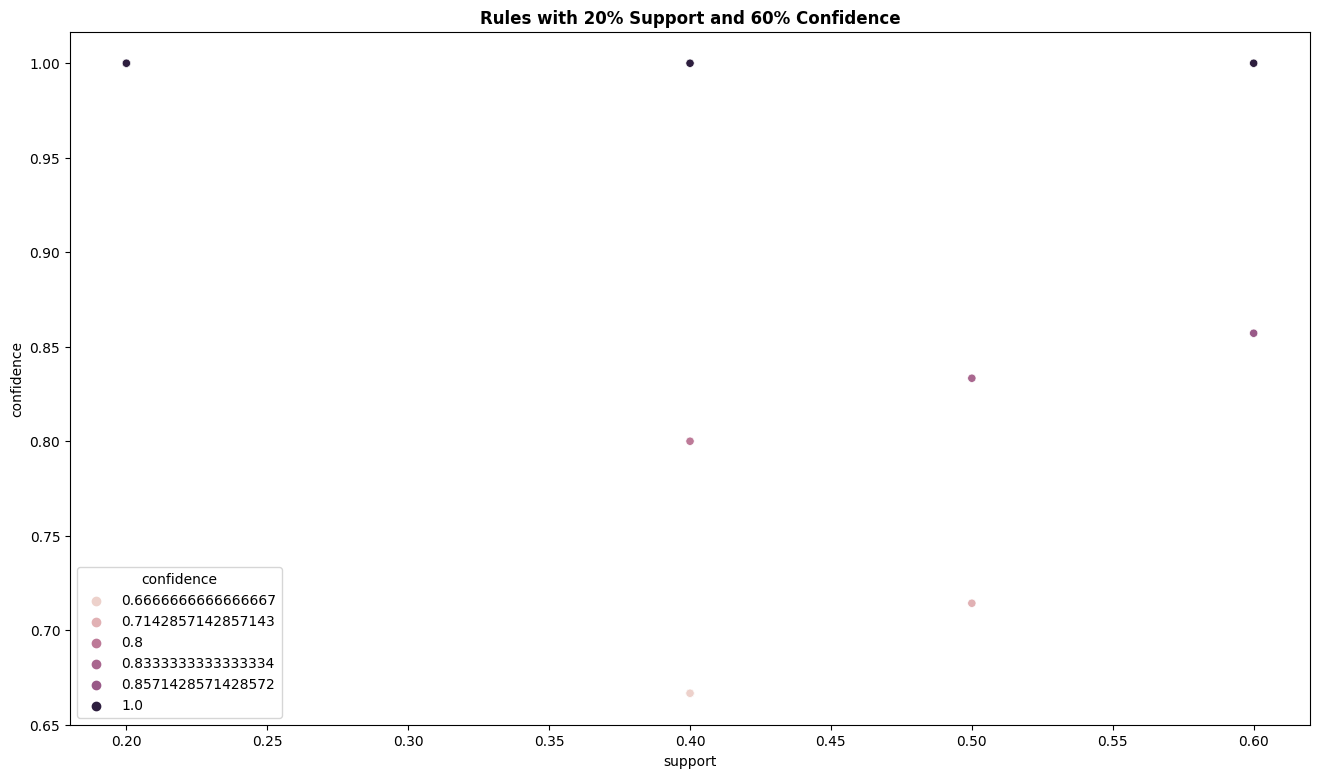

In [350]:
# Visualization of obtained rule
plt.figure(figsize=(16,9))
import seaborn as sns
sns.scatterplot(data=rules_mov_conf2, x="support", y="confidence", hue="confidence")
plt.title("Rules with 20% Support and 60% Confidence", fontsize = 'large', fontweight = 'bold')

<Axes: title={'center': 'LIFT'}, xlabel='lift', ylabel='Count'>

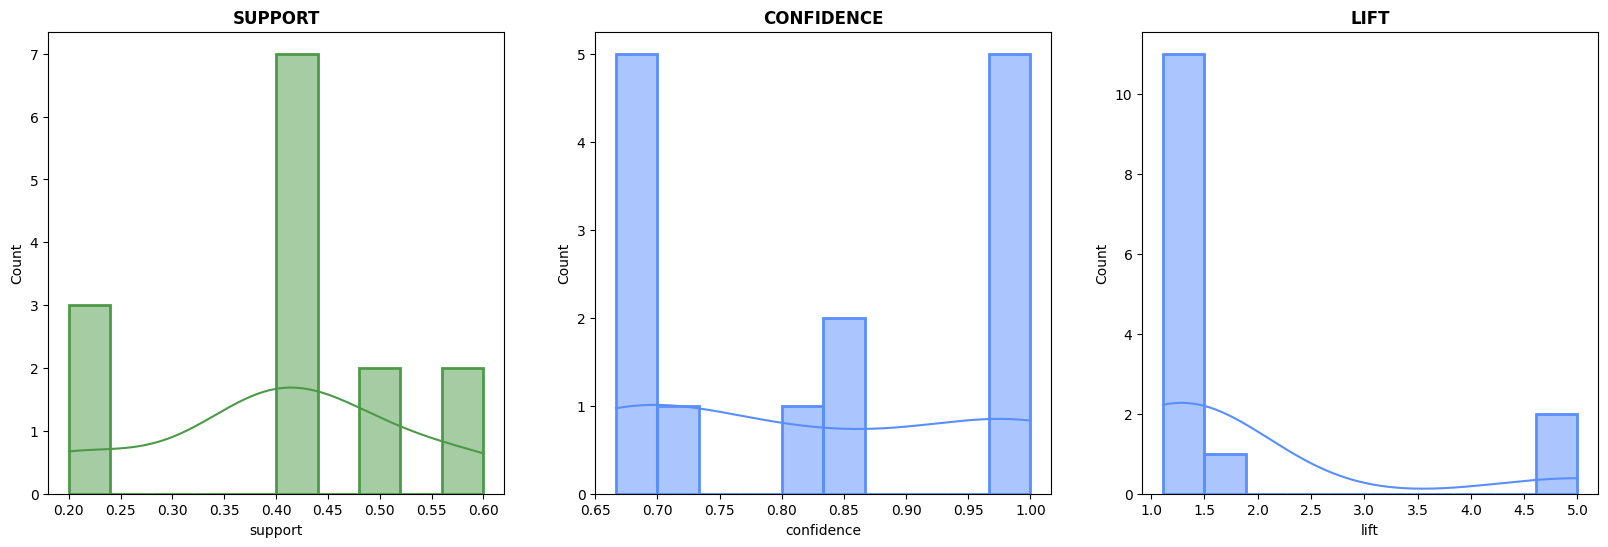

In [351]:
# Visualization of obtained rule using Seaborn
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.title("SUPPORT",fontsize='large',fontweight='bold')
sns.histplot(rules_mov_conf2, x='support', color='#4c9a47', edgecolor='#4c9a47', linewidth=2, bins=10, kde=True)

plt.subplot(1,3,2)
plt.title("CONFIDENCE",fontsize='large',fontweight='bold')
sns.histplot(rules_mov_conf2, x='confidence', color='#598eff', edgecolor='#598eff', linewidth=2, bins=10, kde=True)

plt.subplot(1,3,3)
plt.title("LIFT",fontsize='large',fontweight='bold')
sns.histplot(rules_mov_conf2, x='lift', color='#598eff', edgecolor='#598eff', linewidth=2, bins=10, kde=True)

### ***4. Association rules with 5% Support and 80% confidence*** ###

In [352]:
# With 5% Support
movie_ar_5=apriori(movie_data,min_support=0.05,use_colnames=True)
movie_ar_5['Length'] = movie_ar_5['itemsets'].apply(lambda x: len(x))
movie_ar_5

,support,itemsets,Length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.1,(Harry Potter2),1
7,0.1,(LOTR),1
8,0.1,(Braveheart),1
9,0.2,(Green Mile),1


In [353]:
movie_ar_5.sort_values("support", ascending = False).head(5)

,support,itemsets,Length
1,0.7,(Gladiator),1
0,0.6,(Sixth Sense),1
4,0.6,(Patriot),1
17,0.6,"(Patriot, Gladiator)",2
10,0.5,"(Sixth Sense, Gladiator)",2


The Top 5 highest Support Scores are the same as seen earlier.

***Confidence min_threshold > 0.8***

In [354]:
# with 80% Confidence
rules_mov_conf3 = association_rules(movie_ar_5,metric='confidence', min_threshold=0.8)
rules_mov_conf3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf,0.444444
2,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
...,...,...,...,...,...,...,...,...,...,...
123,"(Green Mile, LOTR2)","(Sixth Sense, Harry Potter1, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
124,"(LOTR2, Harry Potter1)","(Sixth Sense, Green Mile, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
125,"(Green Mile, LOTR1)","(Sixth Sense, LOTR2, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
126,"(Harry Potter1, LOTR1)","(Sixth Sense, Green Mile, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000


In [355]:
rules_mov_conf3.sort_values(by='confidence',ascending=False).head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
64,"(LOTR2, LOTR1, Harry Potter1)",(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf,0.444444
1,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf,0.444444
94,"(Green Mile, Harry Potter1)","(Sixth Sense, LOTR2)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000
93,"(Green Mile, LOTR2)","(Sixth Sense, Harry Potter1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000
92,"(Sixth Sense, Harry Potter1)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000


##### **INFERENCE:** #####
- All the above listed 5 records have the confidence of 1 i.e. 100%.
- All have lift percentages > 1 indicating a high correlation between the items i.e., the 'antecedents' and 'consequents'.
- They all possess high conviction i.e., inf, indicating that the 'consequents' is highly depending on the 'antecedents'.
- There is a high correlation between the purchases of the 'consequents' if the 'antecedents' is purchased i.e., purchase of *LOTR1* if the combination *(LOTR2, Sixth Sense, Harry Potter1)* is purchased, purchase of *Sixth Sense* if *LOTR* is purchased, purchase of combination *(Green Mile, Sixth Sense)* if combination *(LOTR2, Harry Potter1)* is purchased, purchase of combination *(Green Mile, Harry Potter1)* if combination *(LOTR2, Sixth Sense)* is purchased, purchase of combination *(LOTR2, Sixth Sense)* if combination *(Green Mile, Harry Potter1)* is purchased.


Text(0.5, 1.0, 'Rules with 20% Support and 60% Confidence')

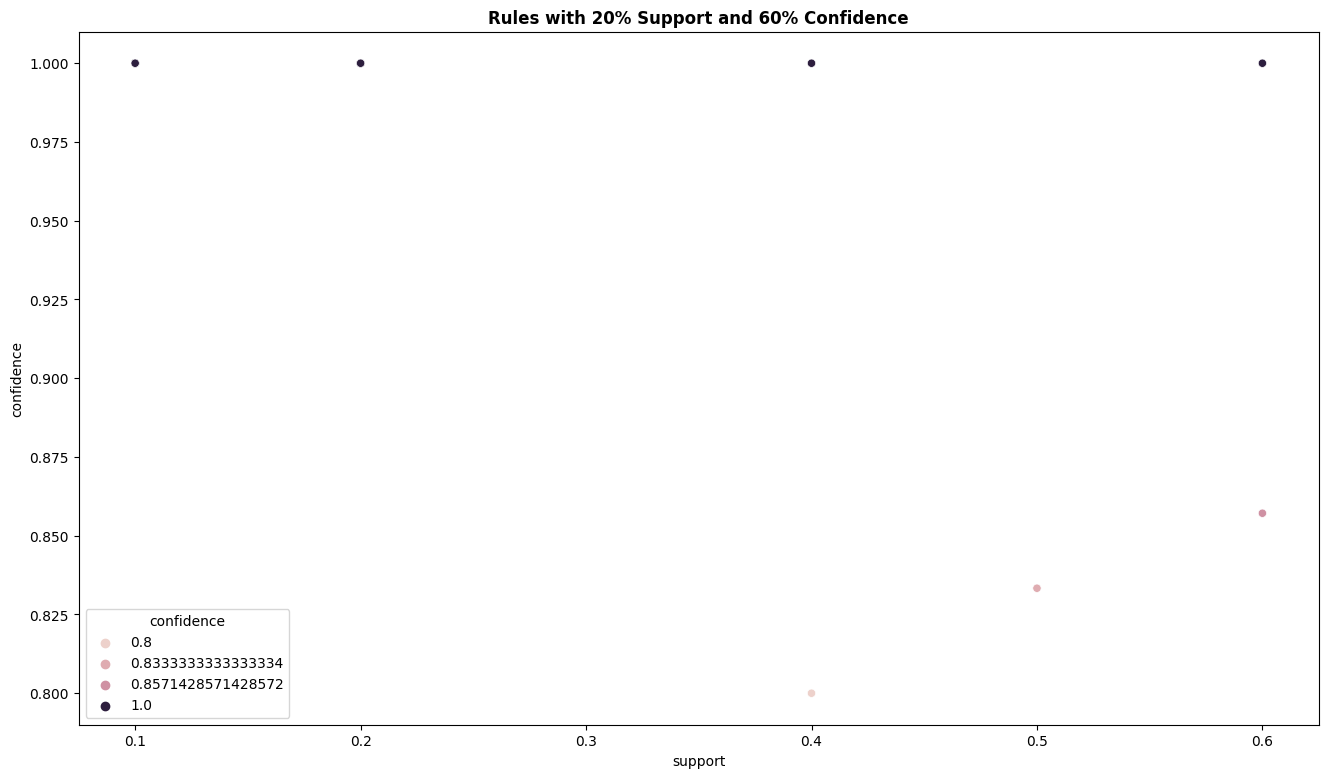

In [356]:
# Visualization of obtained rule
plt.figure(figsize=(16,9))
import seaborn as sns
sns.scatterplot(data=rules_mov_conf3, x="support", y="confidence", hue="confidence")
plt.title("Rules with 20% Support and 60% Confidence", fontsize = 'large', fontweight = 'bold')

<Axes: title={'center': 'LIFT'}, xlabel='lift', ylabel='Count'>

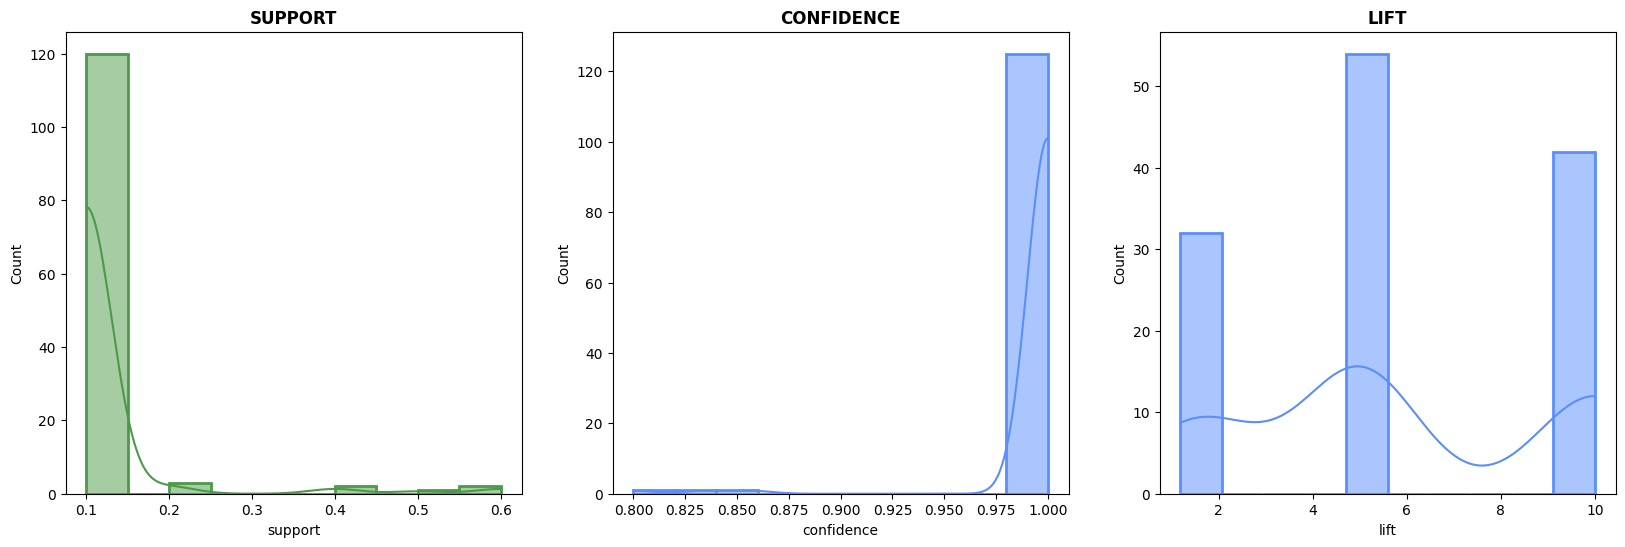

In [357]:
# Visualization of obtained rule using Seaborn
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.title("SUPPORT",fontsize='large',fontweight='bold')
sns.histplot(rules_mov_conf3, x='support', color='#4c9a47', edgecolor='#4c9a47', linewidth=2, bins=10, kde=True)

plt.subplot(1,3,2)
plt.title("CONFIDENCE",fontsize='large',fontweight='bold')
sns.histplot(rules_mov_conf3, x='confidence', color='#598eff', edgecolor='#598eff', linewidth=2, bins=10, kde=True)

plt.subplot(1,3,3)
plt.title("LIFT",fontsize='large',fontweight='bold')
sns.histplot(rules_mov_conf3, x='lift', color='#598eff', edgecolor='#598eff', linewidth=2, bins=10, kde=True)

### **Tweeking based on conditions to get rules with -** ###
- Support = 10%
- Atleast 2 antecedents
- Confidence score of > 0.8
- Lift score of > 1.5

In [358]:
# Identifying the frequent items using Association rule with 10% Support

movie_ar_10=apriori(movie_data,min_support=0.1,use_colnames=True)
movie_ar_10['Length'] = movie_ar_10['itemsets'].apply(lambda x: len(x))
movie_ar_10.head()

,support,itemsets,Length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1


In [359]:
# Creating rules with the following conditions -
# Support = 10%
# Only 1 antecedents 
# Confidence score of >= 80% i.e., 0.8
# That have a lift score of 1.5

from mlxtend.frequent_patterns import association_rules

m_rules_10 = association_rules(movie_ar_10, metric="lift", min_threshold=1.5)
m_rules_10 = association_rules(movie_ar_10, metric="confidence", min_threshold=0.8)
m_rules_10["antecedent_len"] = m_rules_10["antecedents"].apply(lambda x: len(x))

rules_m_cond1 = m_rules_10[(m_rules_10['antecedent_len'] >= 2) &  (m_rules_10['confidence'] > 0.8) & (m_rules_10['lift'] > 1.5)]
rules_m_cond1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_len
15,"(LOTR, Gladiator)",(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf,0.444444,2
17,"(Green Mile, Gladiator)",(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf,0.444444,2
18,"(Sixth Sense, Harry Potter1)",(LOTR1),0.1,0.2,0.1,1.0,5.000000,0.08,inf,0.888889,2
19,"(Sixth Sense, LOTR1)",(Harry Potter1),0.1,0.2,0.1,1.0,5.000000,0.08,inf,0.888889,2
20,"(LOTR1, Harry Potter1)",(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf,0.444444,2
...,...,...,...,...,...,...,...,...,...,...,...
123,"(Green Mile, LOTR2)","(Sixth Sense, Harry Potter1, LOTR1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000,2
124,"(LOTR2, Harry Potter1)","(Sixth Sense, Green Mile, LOTR1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000,2
125,"(Green Mile, LOTR1)","(Sixth Sense, LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000,2
126,"(Harry Potter1, LOTR1)","(Sixth Sense, Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000,2


<Axes: xlabel='support', ylabel='confidence'>

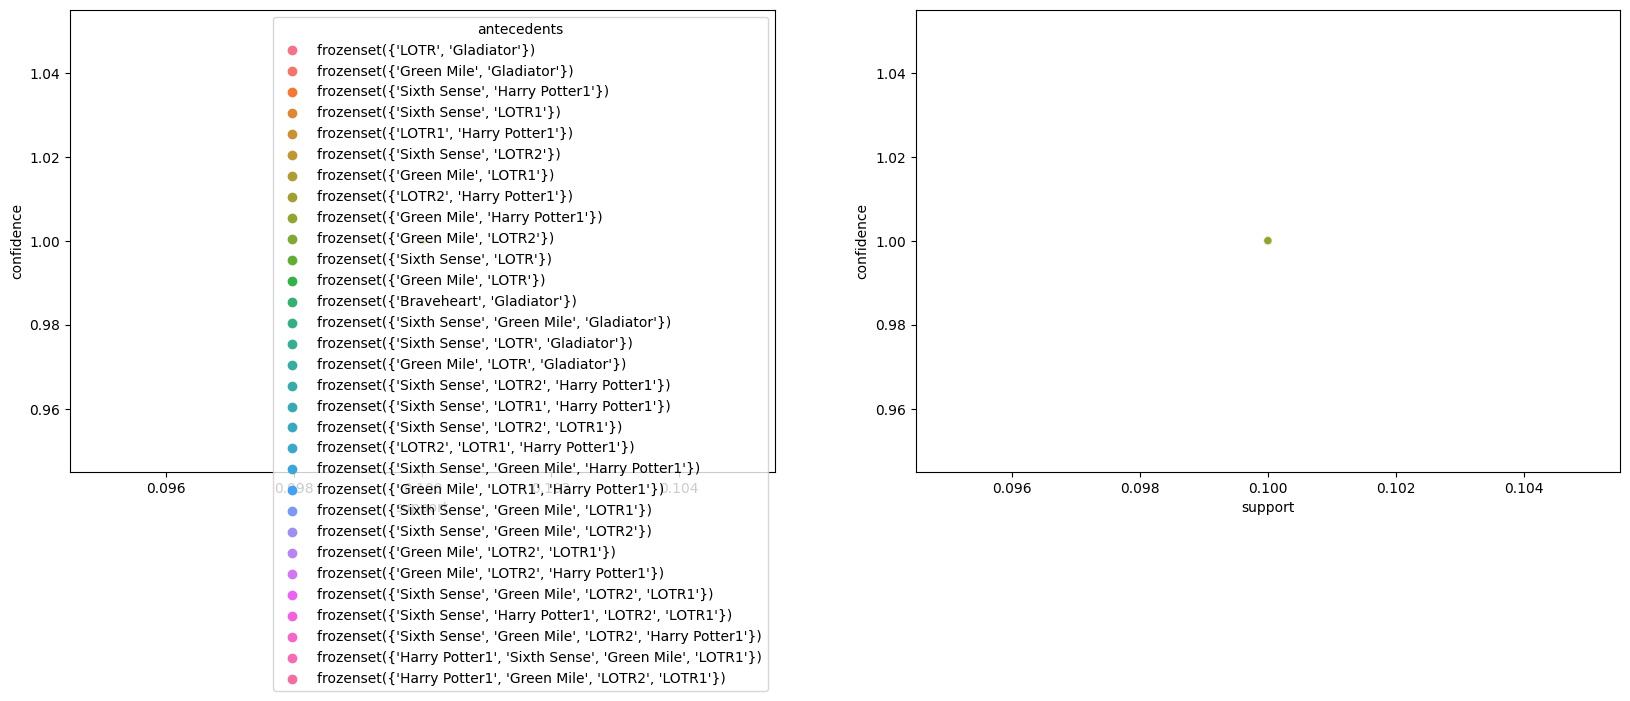

In [360]:
# visualization of obtained rule - With and Without Legend

import seaborn as sns
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.scatterplot(data=rules_m_cond1, x="support", y="confidence", hue="antecedents")

# visualization of obtained rule - Withoud Legend
plt.subplot(1,2,2)
sns.scatterplot(data=rules_m_cond1, x="support", y="confidence", hue="antecedents", legend=None)

Since all the records have the same support and confidence value i.e. 1, therefore we can see only 1 point. We can refer through the next chart as well to see the frequency

<Axes: title={'center': 'LIFT'}, xlabel='lift', ylabel='Count'>

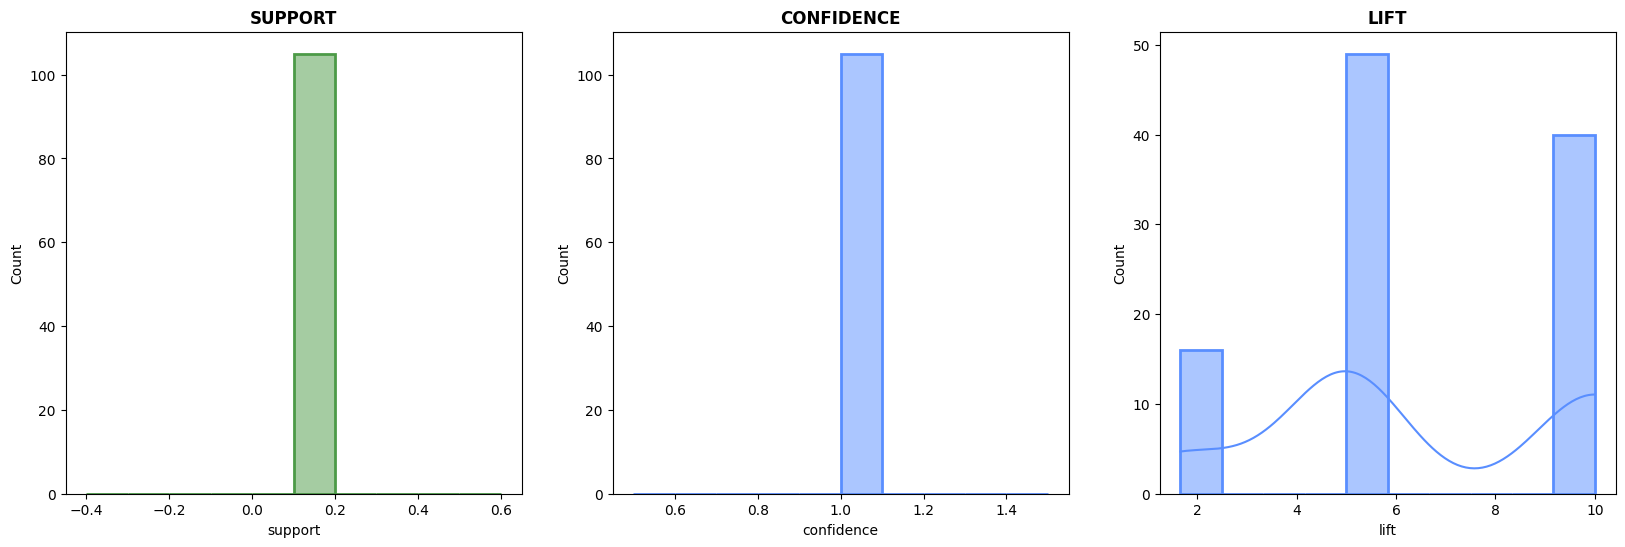

In [361]:
# Visualization of obtained rule using Seaborn
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.title("SUPPORT",fontsize='large',fontweight='bold')
sns.histplot(rules_m_cond1, x='support', color='#4c9a47', edgecolor='#4c9a47', linewidth=2, bins=10, kde=True)

plt.subplot(1,3,2)
plt.title("CONFIDENCE",fontsize='large',fontweight='bold')
sns.histplot(rules_m_cond1, x='confidence', color='#598eff', edgecolor='#598eff', linewidth=2, bins=10, kde=True)

plt.subplot(1,3,3)
plt.title("LIFT",fontsize='large',fontweight='bold')
sns.histplot(rules_m_cond1, x='lift', color='#598eff', edgecolor='#598eff', linewidth=2, bins=10, kde=True)

## **Network Plot** ##
### **Creation of Network Plot to check relations between the purchase patterns of the Movies** ###

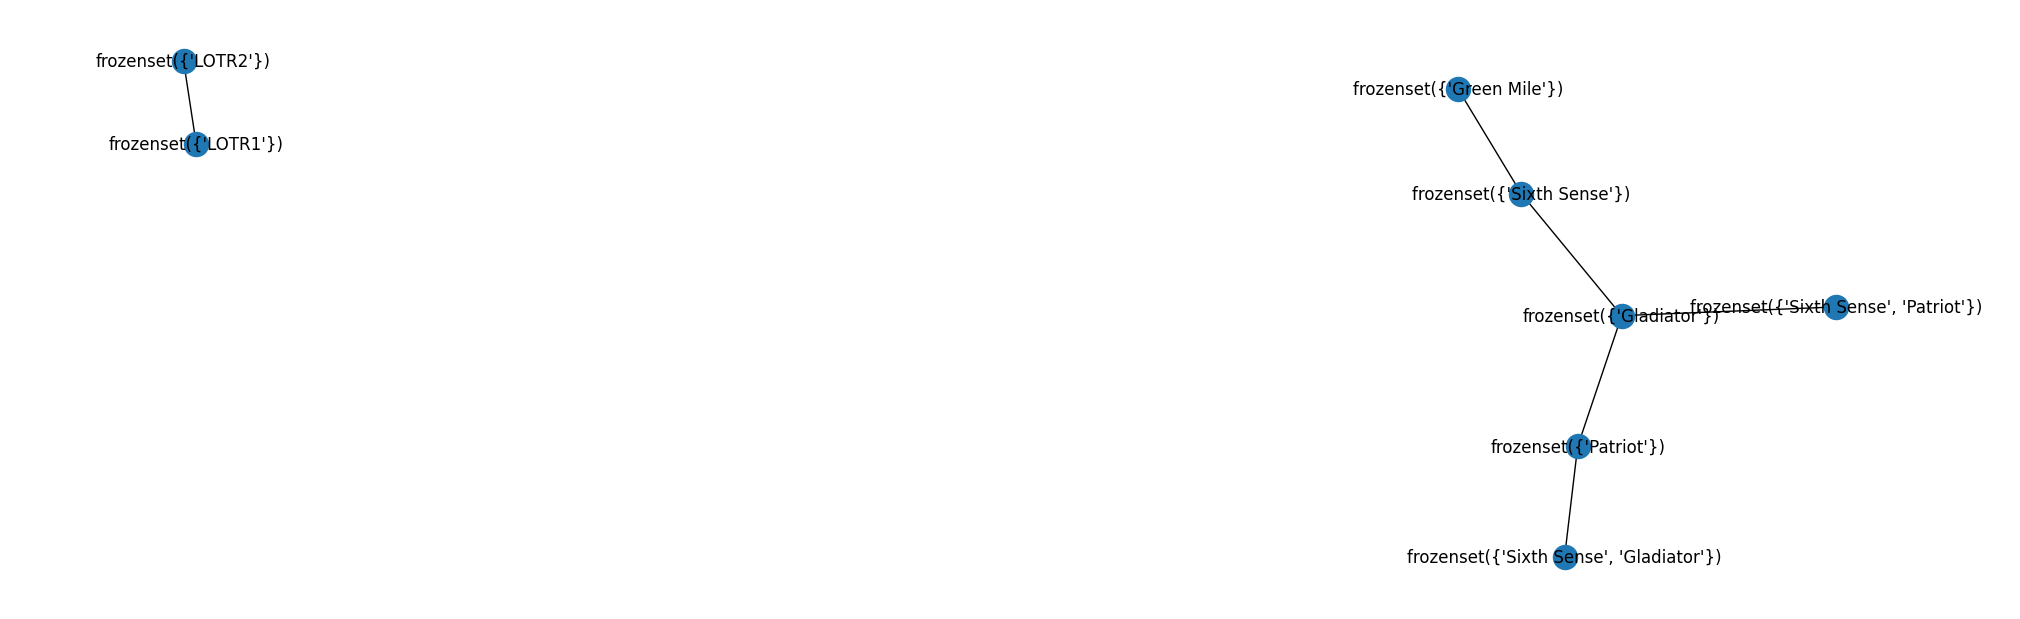

In [362]:
# Creating Network Plot using rule 'rules_mov_conf4'

plt.figure(figsize=(20,6))

# Building a network graph
netplot = pd.DataFrame({'from':rules_mov_conf4['antecedents'], 'to':rules_mov_conf4['consequents']})
netplot
import networkx as nx
networkplot= nx.from_pandas_edgelist(netplot,'from','to')

# Plotting the graph
nx.draw(networkplot,with_labels=True)
plt.show()

### **INFERENCE** ####
Based on the network graph we can see that **'Gladiator'**', **'Sixth Sense'**' and **''Patriot'**' seem to be the **'most popular movies**' purchased. As many items are interlinked with these products, the chances of those items being purchased are also more.